# Part 03 - Data Visualization with R

#### by Liew Jun Yen

## 3.0 Data Visualization

## Packages Installation

In [10]:
install.packages("dplyr") #manipulate, clean, summarize unstructured data
install.packages("ggplot2") #graph plotting
install.packages("ggrepel") #positioning of text labels
install.packages("packcircles") #circlepacking
install.packages("treemap") #treemap graph
install.packages("lubridate") #dates and time formatting
install.packages("gridExtra") #multiple graphical objects
install.packages("fmsb") #radar chart

Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpY7ajrb\downloaded_packages
package 'packcircles' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpY7ajrb\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
treemap  2.4-3  2.4-4             FALSE



installing the source package 'treemap'


Warning message in install.packages("treemap"):
"installation of package 'treemap' had non-zero exit status"


package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpY7ajrb\downloaded_packages
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpY7ajrb\downloaded_packages
package 'IRdisplay' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpY7ajrb\downloaded_packages


### <div style="text-align: justify"> Question 1: According to the accumulated total COVID-19 cases in each continent, which continent has the highest total COVID-19 cases? ; In each of the continent, which countries possessed the highest total COVID-19 cases? </div>

#### 1.1 Number of total COVID-19 cases by continent

In [ ]:
library(dplyr)
library(ggplot2)
library(ggrepel)

continent_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(!continent == "") %>%
  group_by(continent) %>%
  summarise(total_cases = sum(total_cases)) %>%
  arrange(desc(continent)) %>%
  mutate(pie_midpoint = cumsum(total_cases) - total_cases / 2) %>%
  mutate(pie_perc = round(total_cases / sum(total_cases) * 100, 1)) %>%
  mutate(pie_legend_labs = paste0(continent, " (", total_cases, ")"))

ggplot(continent_cases, aes(x = "", y = total_cases, fill = pie_legend_labs)) +
  geom_bar(width = 1, stat = "identity", color = "black") +
  geom_label_repel(aes(y = pie_midpoint, label = paste0(pie_perc, "%")), force_pull = 100, nudge_x = 1, 
                   show.legend = FALSE) +
  ggtitle("Number of Total COVID-19 Cases by Continent") +
  coord_polar(theta = "y") +
  scale_fill_brewer(palette = "Pastel1") +
  guides(fill = guide_legend(title = "Continent (Total Cases)")) +
  theme_void() + 
  theme(legend.title = element_text(face = "bold"),
        plot.title = element_text(hjust = 1.5, face = "bold", size = 20))

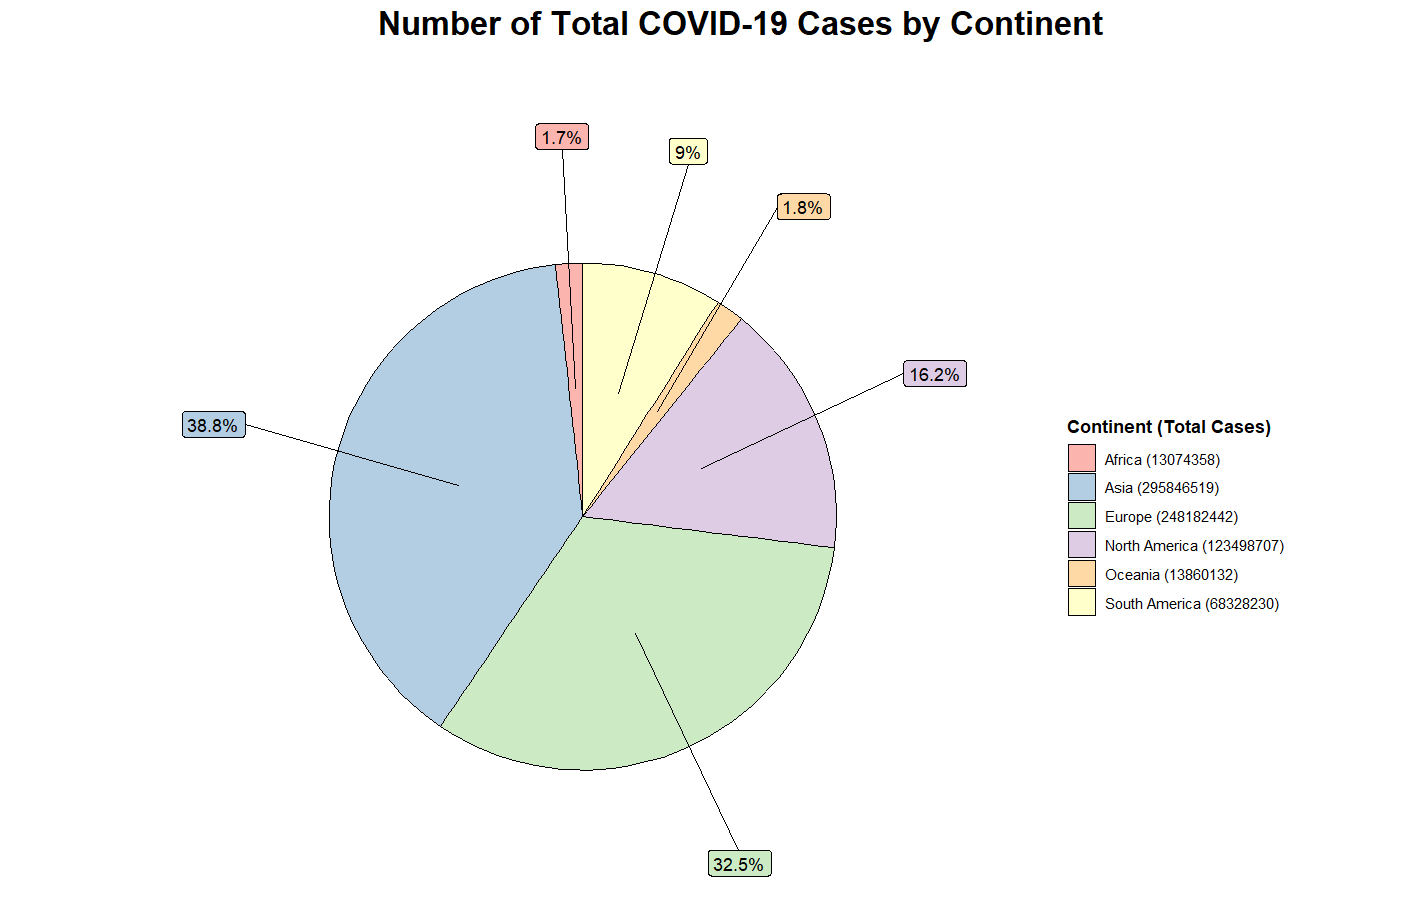

<div style="text-align: justify"> 
$\;\;\;\;\;$ The pie chart displays the number of total COVID-19 cases by continent. There are six continents included: Africa, Asia, Europe, North America, Oceania, and South America. Each of the continents contain different number of total COVID-19 cases. As shown by the pie chart, the majority of total COVID-cases fall into the continent of Asia, representing approximately 38.8% of individuals who have tested positive for COVID-19 in the past, amounting to 295,846,519 COVID-19 cases. Following closely behind is Europe, with approximately 32.5% of the total COVID-19 cases, amounting to 248,182,442 COVID-19 cases. Conversely, the two least rates of total COVID-19 cases fall into the continents of Africa and Oceania, representing approximately 1.7% and 1.8%. Both of the continents contain the amounts of 13,074,358 and 13,860,132 COVID-19 cases.  
</div>

#### 1.2 Total number of COVID-19 Cases by African countries

In [ ]:
library(dplyr)
library(ggplot2)

africa_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'Africa') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases)) %>%
  mutate(index = row_number())

number_of_label <- nrow(africa_total_cases)
angle <- 90 - 360 * (africa_total_cases$index - 0.5) / number_of_label
africa_total_cases$hjust<-ifelse(angle < -90, 1.2, -0.1)
africa_total_cases$angle<-ifelse(angle < -90, angle + 180, angle)

ggplot(africa_total_cases, aes(x = as.factor(country), y = total_cases)) +
  geom_bar(stat = "identity", fill = alpha("cyan")) +
  geom_text(data = africa_total_cases, aes(x = index, y = total_cases, label = paste(country, "(", total_cases, ")"), 
                                            hjust = hjust),
            color = "blue", fontface = "bold", alpha = 0.6, size = 2.5, angle = africa_total_cases$angle, 
            inherit.aes = FALSE) +
  ggtitle("Total Number of COVID-19 Cases by African Countries") +  
  ylim(-3200000, max(africa_total_cases$total_cases) * 1.1) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-0,5), "cm")) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20, vjust = -6)) +
  coord_polar(start = 0)

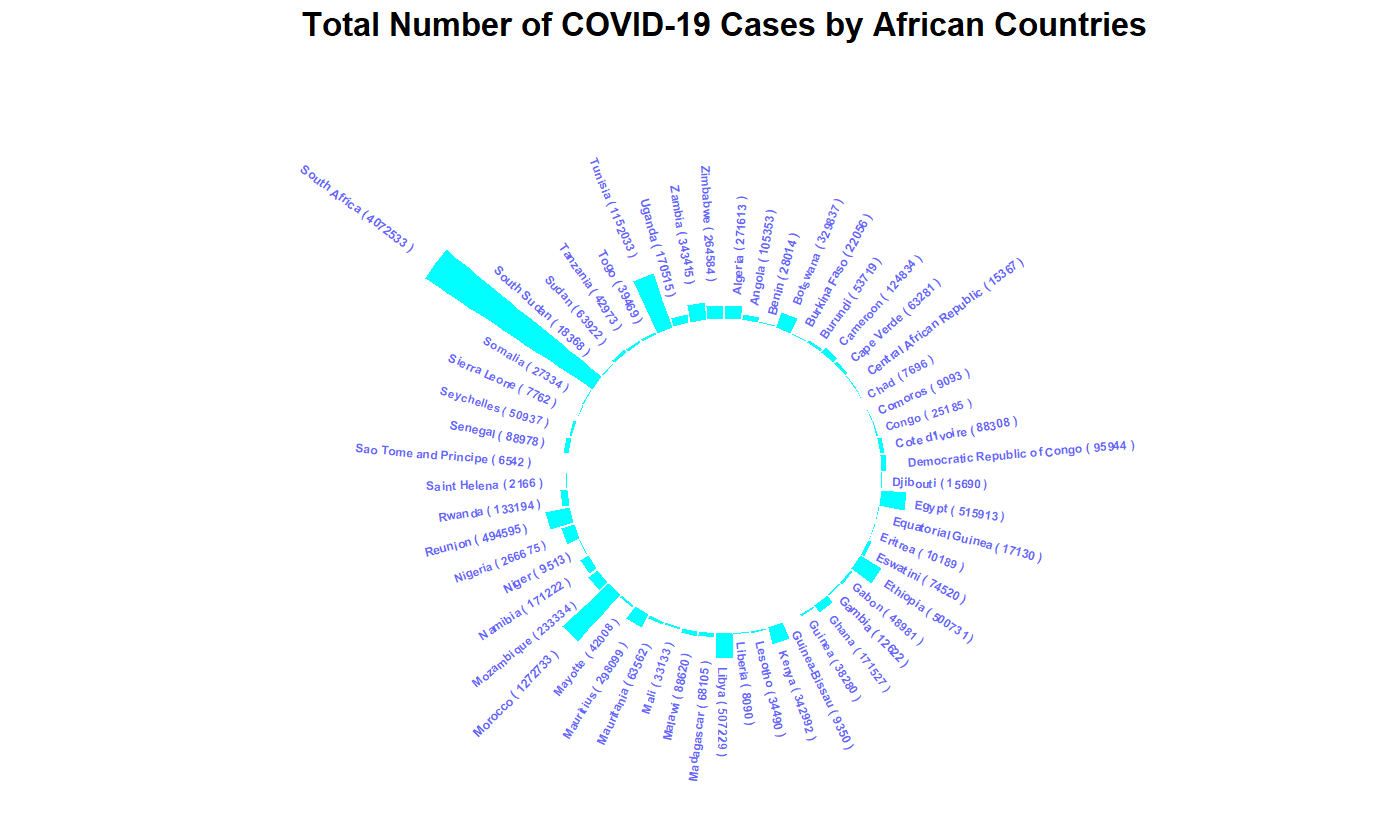

<div style="text-align: justify"> 
$\;\;\;\;\;$ The circular barplot shows the total number of COVID-19 cases by African countries. As illustrated by the chart, South Africa has the highest number of COVID-19 cases among African countries, representing approximately 4,072,533 COVID-19 cases. In lieu of that, there are 3 African countries that have surpassed one million of COVID-19 cases, including Morocco, Tunisia, and South Africa. Morocco has the records of 1,272,733 COVID-19 cases while the Tunisia contains the amount of 1,152,033 COVID-19 cases.   
</div>

#### 1.3 Total number of COVID-19 Cases by European countries

In [ ]:
library(dplyr)
library(ggplot2)

europe_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'Europe') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases))

ggplot(europe_total_cases, aes(x = country, y = total_cases)) +
  geom_segment(aes(x = country, xend = country, y = 0, yend = total_cases), color = "skyblue") +
  geom_point(color = "violet", size = 4) +
  geom_text(data = europe_total_cases, aes(x = country, y = total_cases, label = paste(total_cases), hjust = -0.5),
            color = "skyblue", fontface = "bold", size = 2.5) +
  ggtitle("Total Number of COVID-19 Cases by European Countries") + 
  theme_light() + 
  theme(panel.grid.major.y = element_blank(),
        panel.border = element_blank(),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold")) +
  coord_flip() +
  xlab("Country") +
  ylab("Number of Covid Case") +
  scale_y_continuous(labels = scales::number_format(scale = 1))

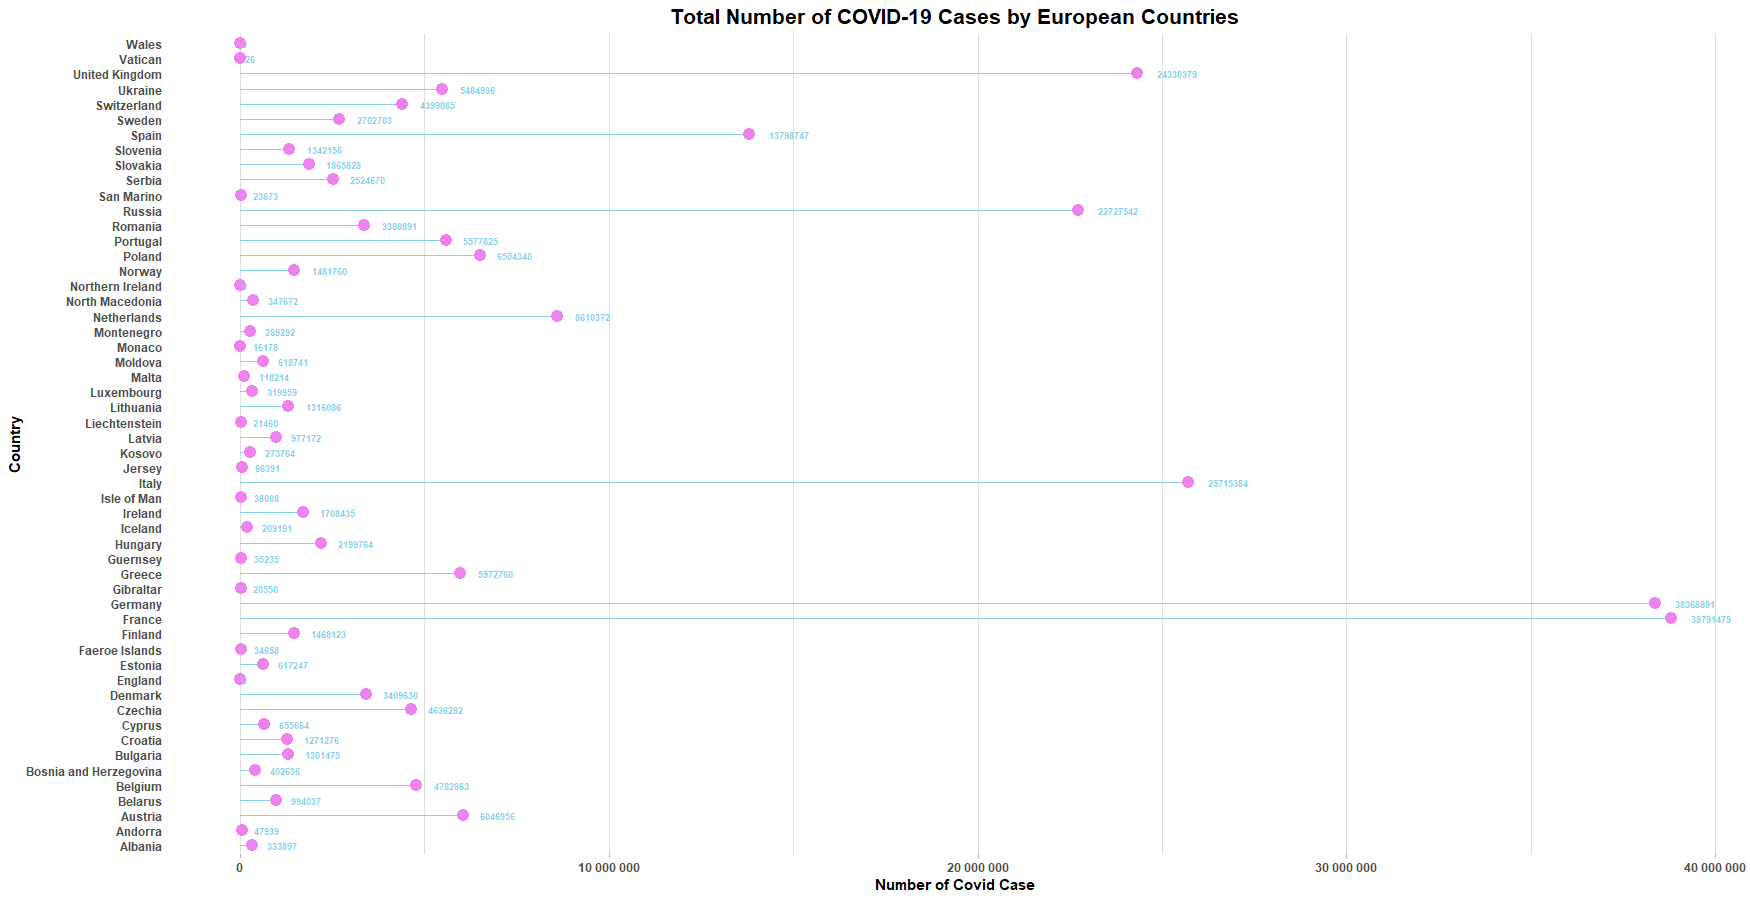

<div style="text-align: justify"> 
$\;\;\;\;\;$ The bar graph displays the total number of COVID-19 cases by European countries. In accordance with the graph, France has the highest number of COVID-19 cases among European countries, representing the amount of 38,791,479 COVID-19 cases. However, the country with the second highest total COVID-19 cases, which is Germany with the amount of 38,361,891 COVID-19 cases, has the smallest difference compared to France's highest number of COVID-19 cases. Additionally, the 3 countries (United Kingdom, Russia, Italy) have COVID-19 cases numbers ranging from 20,000,000 to 30,000,000. Each of these countries represent the following amounts: 24,330,379, 22,727,542, and 25,715,384. This implies that majority of COVID-19 cases in the continent of Europe were emerged from these 5 countries. 
</div>

#### 1.4 Proportion of total COVID-19 cases by Asian countries 

In [ ]:
library(dplyr)
library(ggplot2)
library(packcircles)

asia_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'Asia') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases))

asia_total_cases$perc_cases <- round(asia_total_cases$total_cases / sum(asia_total_cases$total_cases) * 100, 1)
packing <- circleProgressiveLayout(asia_total_cases$total_cases, sizetype = "area")
asia_total_cases <- cbind(asia_total_cases, packing)
circle_plots <- circleLayoutVertices(packing, npoints = 50)

ggplot() +
  geom_polygon(data = circle_plots, aes(x, y, group = id, fill = as.factor(id)), colour = "black", alpha = 0.6) +
  geom_text(data = asia_total_cases, aes(x, y, size = total_cases, label = paste(country, "\n", total_cases, 
                                                                                 "(", perc_cases, "%)"))) +
  ggtitle("Proportion of Total COVID-19 Cases by Asian Countries") +
  scale_size_continuous(range = c(1,5)) +   
  theme_void() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 16)) +
  coord_equal()

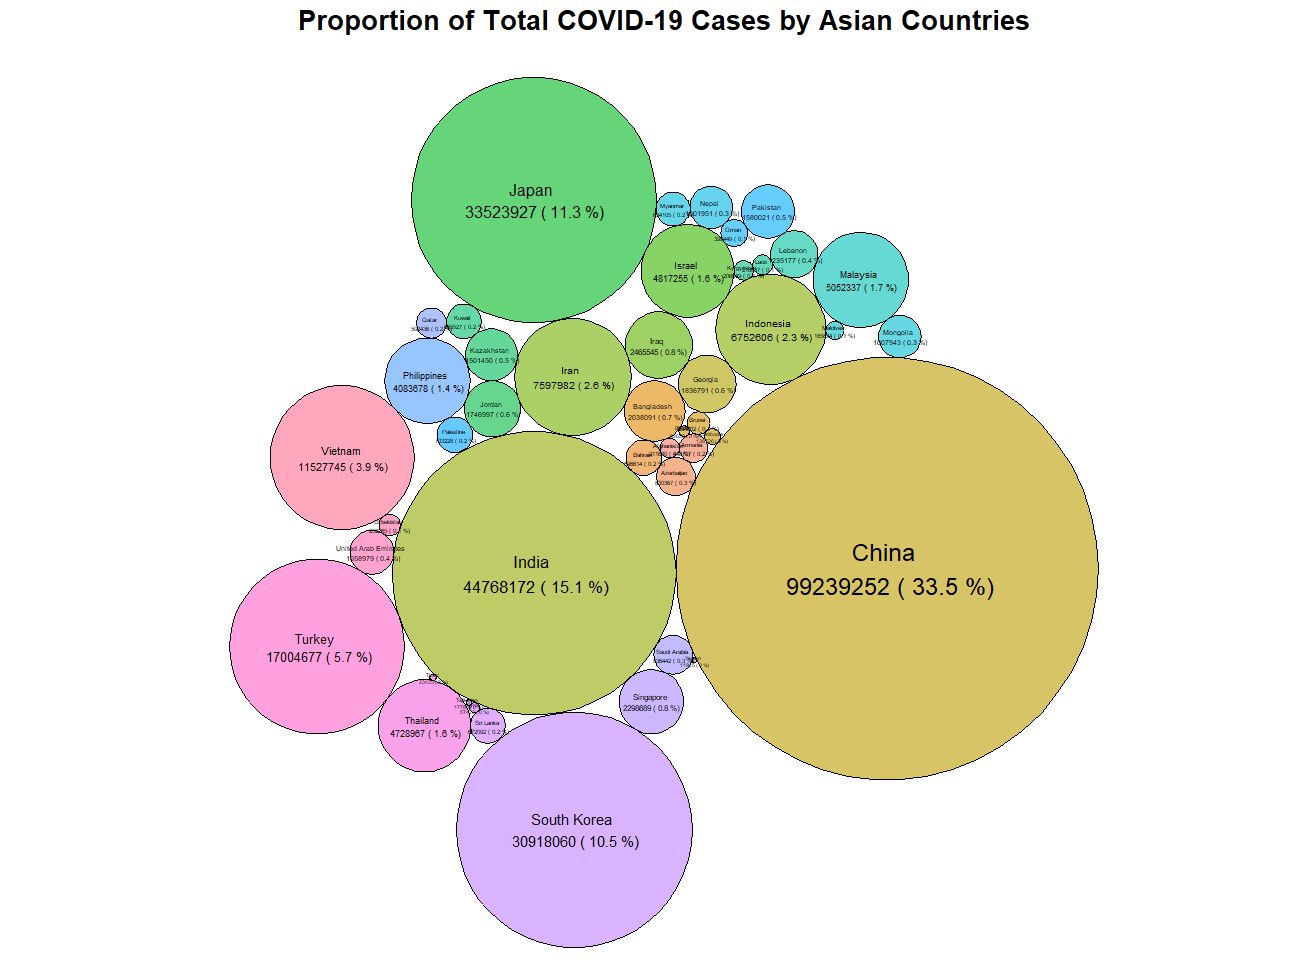

<div style="text-align: justify"> 
$\;\;\;\;\;$ The circular treemap shows the proportion of total COVID-19 cases by Asian countries. As far as I know in a circular treemap, the larger segments represent higher values, while the smaller segments represent lower values. However, is it impossible to determine which countries have the lowest proportion of COVID-19 cases, thereby the countries with smaller proportions will be disregarded, and the focus will be on countries with larger proportions. As depicted in the circular treemap of the top 5 countries with larger proportions of COVID-19 cases, China holds the highest proportion of COVID-19 cases, representing the proportion of the total. The following of the countries with lower proportions of total COVID-19 cases behind China are India, Japan, South Korea, and Turkey, representing the proportions of 15.1%, 11.3%, 10.5%, and 5.7%. 
</div>

#### 1.5 Total number of COVID-19 cases by North American countries

In [ ]:
library(dplyr)
library(ggplot2)

na_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'North America') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases))

ggplot(na_total_cases, aes(x = country, y = total_cases, fill = country)) +
  geom_bar(stat = "identity") +
  geom_text(data = na_total_cases, aes(x = country, y = total_cases, label = paste(total_cases), hjust = -0.1),
            color = ifelse(na_total_cases$total_cases > mean(na_total_cases$total_cases), "red", "green"), 
            fontface = "bold", size = 2.7) +
  ggtitle("Total Number of COVID-19 Cases by North American Countries") +
  coord_flip() +
  xlab("Country") +
  ylab("Number of Covid Cases") +
  theme_bw() + 
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

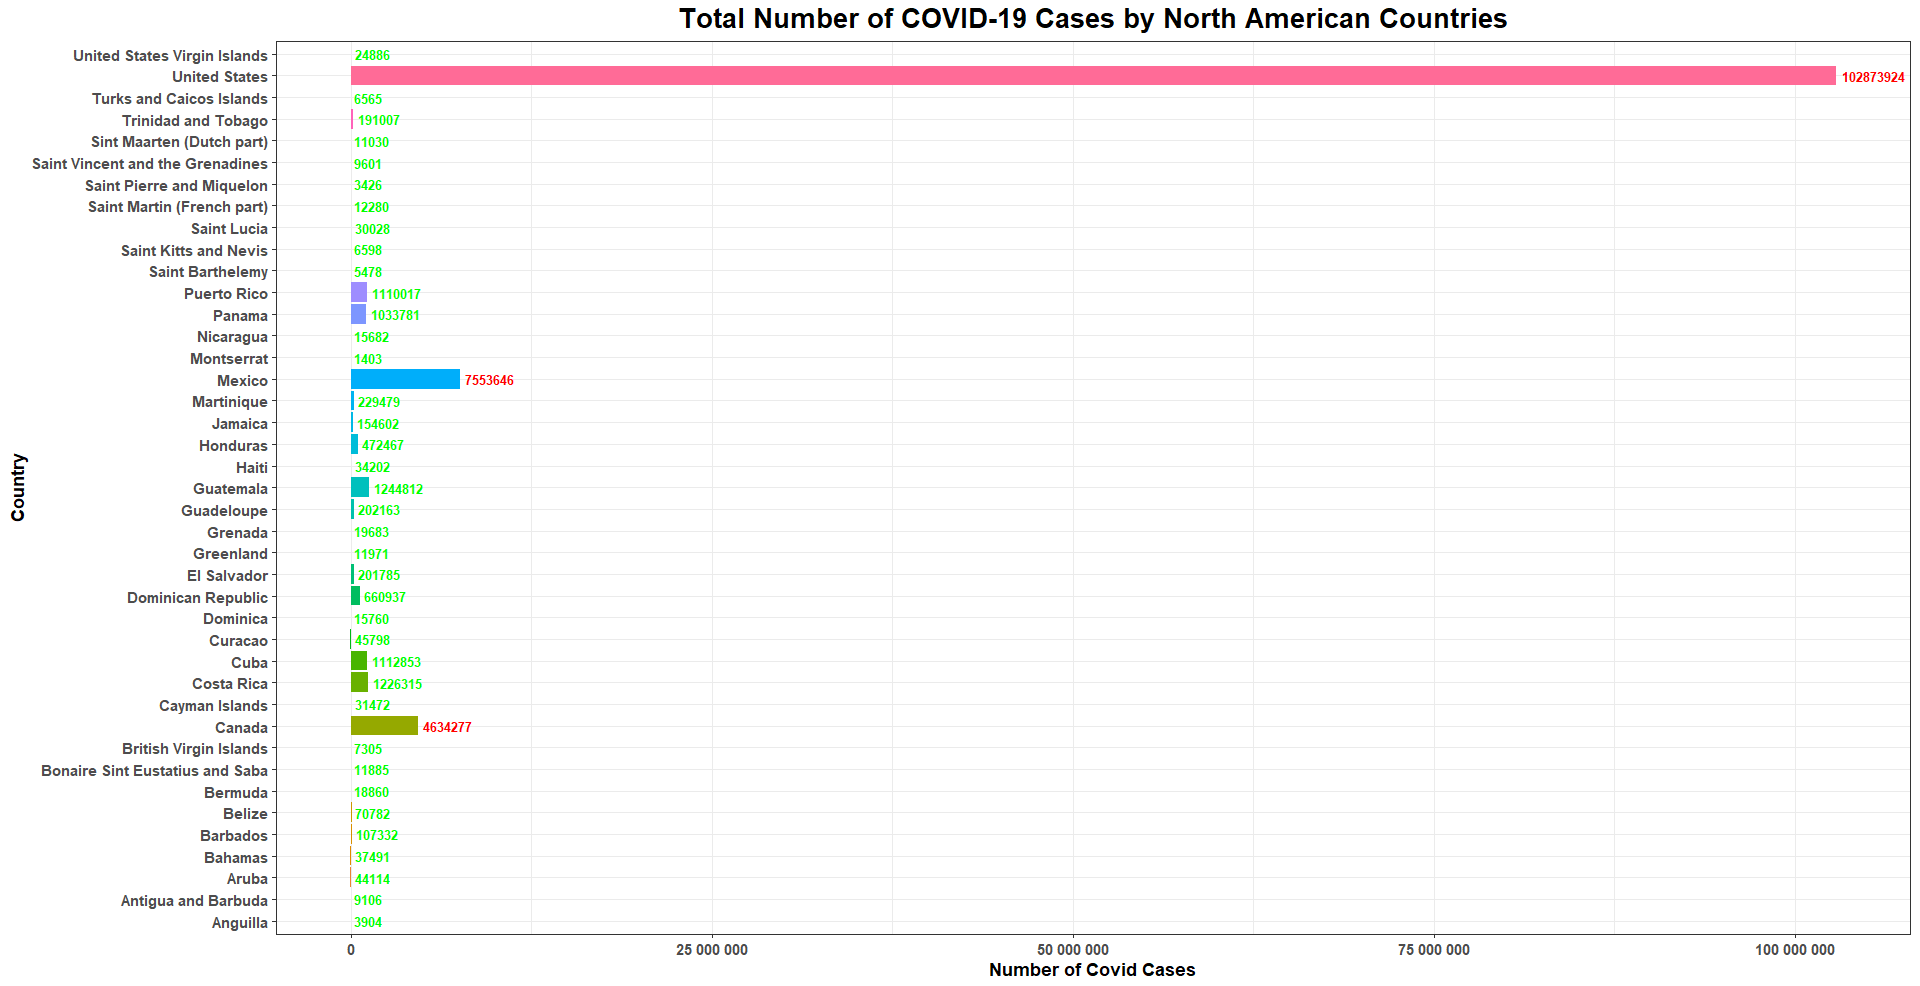

<div style="text-align: justify"> 
$\;\;\;\;\;$ The bar graph represents the total number of COVID-19 cases by North American countries. From the data presented in the graph, the United States prominently holds the highest number of COVID-19 cases, representing the number of 102,873,924 in total. In lieu of that, I am able to make my judgement that the majority of COVID-19 cases in the continent of North America are derived from the country of United States. Additionally, the Mexico, Canada and United States represent the total number of COVID-19 cases in the color of red due to these countries have exceeded the average number of COVID-19 cases among the North American countries. This implies that while the United States has a significantly high number of COVID-19 cases, Mexico and Canada also contribute substantially to the overall count.
</div>

#### 1.6 Proportion of total COVID-19 cases by Oceanian countries

In [ ]:
library(dplyr)
library(treemap)

oceania_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'Oceania') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases))

options(scipen = 15000000)
oceania_total_cases$treemap_label <- paste(oceania_total_cases$country, oceania_total_cases$total_cases, sep = "\n")
png(filename ="tree.png", width = 850, height = 600)

treemap(oceania_total_cases, 
        index = "treemap_label", 
        vSize = "total_cases",
        vColor = "total_cases",
        palette = "Reds",
        mapping = c(0, 7500000, 15000000),
        range = c(0, 15000000),
        n = 5,
        type = "value",
        title = "Proportion of Total COVID-19 Cases by Oceanian Countries",
        title.legend = "Total Cases",
        fontsize.title = 25,
        fontsize.legend = 16)

dev.off()

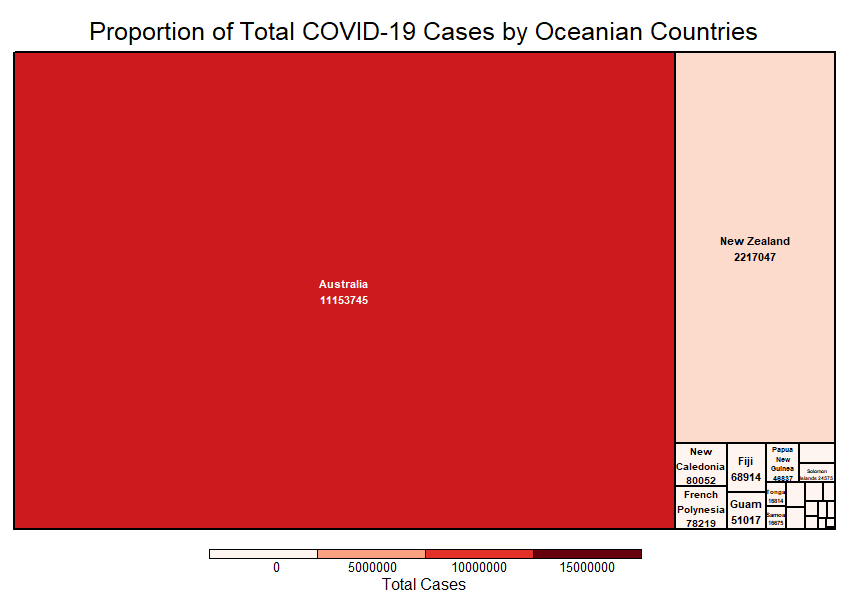

<div style="text-align: justify"> 
$\;\;\;\;\;$ The treemap displays the proportion of total COVID-19 cases by Oceanian countries. The treemap has a similar way of visualization to the circular treemap. In accordance to the treemap, Australia holds the highest number of COVID-19 cases, representing the number of 11,153,745 in total. Following to the second highest number of COVID-19 cases is the country of New Zealand, representing the number of 2,217,047 in total. 
</div>

#### 1.7 Total number of COVID-19 cases bySouth American countries

In [ ]:
library(dplyr)
library(ggplot2)
library(ggrepel)

sa_total_cases = cov_data %>%
  filter(date == '2023-04-12') %>%
  filter(continent == 'South America') %>%
  group_by(country) %>%
  summarise(total_cases = sum(total_cases)) %>%
  arrange(desc(country)) %>%
  mutate(donut_perc = round(total_cases / sum(total_cases) * 100, 1)) %>%
  mutate(donut_legend_labs = paste0(country, " (", total_cases, ")"))

sa_total_cases$fraction <- sa_total_cases$total_cases / sum(sa_total_cases$total_cases)
sa_total_cases$ymax <- cumsum(sa_total_cases$fraction)
sa_total_cases$ymin <- c(0, head(sa_total_cases$ymax, n = -1))
sa_total_cases$labelPosition <- (sa_total_cases$ymax + sa_total_cases$ymin) / 2

ggplot(sa_total_cases, aes(fill = donut_legend_labs)) +
  geom_rect(aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3), color = "black") +
  geom_label_repel(aes(x = 3.5, y = labelPosition, label = paste0(country, "\n", donut_perc, "%")), 
                   force_pull = 100, nudge_x = 1, show.legend = FALSE, max.overlaps = Inf) +
  ggtitle("Total Number of COVID-19 Cases by South American Countries") +
  coord_polar(theta = "y", clip = "off") +
  xlim(c(2,5)) + #convert into donut chart
  labs(fill = "Country (Total Cases)") +
  theme_void() +
  theme(plot.title = element_text(hjust = 2, face = "bold", size = 16),
        legend.title = element_text(face = "bold"))

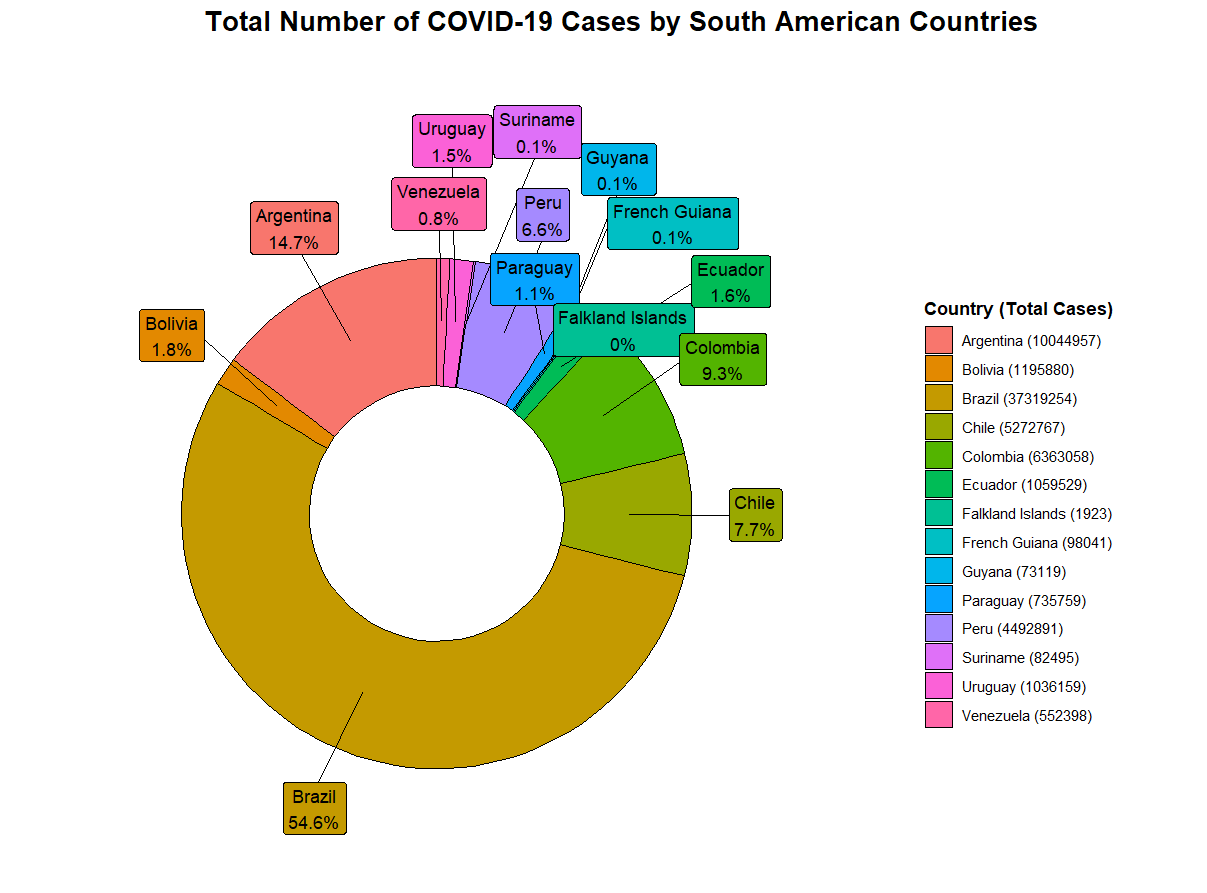

<div style="text-align: justify"> 
$\;\;\;\;\;$ The donut chart represents the total number of COVID-19 cases by South American countries. By observing the donut chart, half of the proportion of COVID-19 cases among South American countries originates from Brazil, representing the rate of 54.6% and the number of 37,319,254 COVID-19 cases in total. Following the second country with highest proportion of COVID-19 cases is Argentina, representing the rate of 14.7% and the number of 10,044,957 COVID-19 cases in total. In lieu of that, the remaining countries hold their respective rates below 10%.  
</div>

### <font color='red'> Findings [Question 1]: </font> 

<div style="text-align: justify"> 
$\;\;\;\;\;$ The continent of Asia contributed the highest proportion of COVID-19 cases which represents the rate of 38.8%. Even though a significant number of COVID-19 cases originate from Asia as a whole, China is the country that has made the largest contribution to the overall number of COVID-19 cases, representing the rate of 33.5% and the number of 99,239,252. South Africa holds the highest number of COVID-19 cases among the African countries. In the European countries, France contributes substantially to the overall COVID-19 cases. Regarding the countries with highest number of COVID-19 cases among the Oceanian and South American countries are Australia and Brazil. Despite the COVID-19 cases were originated from China and holding the highest proportion of COVID-19 cases among Asian countries, United States also holds the highest proportion of COVID-19 cases among the North American countries as well as in the entire world. <br>
<br>
$\;\;\;\;\;$ The COVID-19 outbreak happened in China before other countries. In reference to this concern, the COVID-19 vaccination had not been developed, which subsequently caused China's number of COVID-19 cases to skyrocket in the beginning of the pandemic. Furthermore, the neighboring countries of China had a higher risk of infection, leading to a greater number of Asian countries' populations being infected with COVID-19 during the outbreak and causing a significant increase in the number of COVID-19 cases in Asia. Additionally, the handling of the COVID-19 pandemic in the United States became a subject of political debate and dissagreement. Different states, and even different political leaders within the same state, had varying approaches and strategies to control the spread of the virus. This implies that some states in the United States had relaxed policies and subsequently experienced more rapid transmission of COVID-19 disease. <br>
<br>
$\;\;\;\;\;$ In order to mitigate the increasing number of COVID-19 cases in the countries with higher COVID-19 cases, governments should maintain the enforcement of strict public health measures such as mask mandates, social distancing guidelines, and restrictions on large gatherings. Mask mandates can effectively control the spread of infectious disease because masks act as a barrier, reducing the likelihood of respiratory droplets from an infected person potentially transmitting the virus to others. Furthermore, social distancing guidelines act as a recommendation to instruct individuals to maintain a physical distance between individuals in order to reduce the spread of infectious diseases. The restriction on large gatherings is to prevent superspreading events from a group of people and mitigate the opportunities for the virus to spread to other individuals.
</div>    

### <div style="text-align: justify"> Question 2: In each of the continent's countries with the highest COVID-19 cases, how impactful are the vaccination and booster on mitigating the severity of the disease?</div>

#### 2.1 Countries with the highest COVID-19 cases on each continent

In [ ]:
library(dplyr)
library(ggplot2)

top6_countries_data = cov_data %>%
  filter(country %in% c("South Africa", "France", "China", "United States", "Australia", "Brazil")) %>%
  group_by(country) %>%
  summarise(new_cases = sum(new_cases))

ggplot(top6_countries_data, aes(x = country)) +
  geom_bar(aes(y = new_cases, fill = country), stat = "identity") +
  geom_text(aes(x = country, y = new_cases, label = paste(new_cases), hjust = 0.5)) +
  ggtitle("Countries with Highest COVID-19 Cases on Each Continent") +
  scale_fill_brewer(palette = "Pastel2") +
  xlab("Country") +
  ylab("Number of COVID-19 Case") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.position = "none",
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

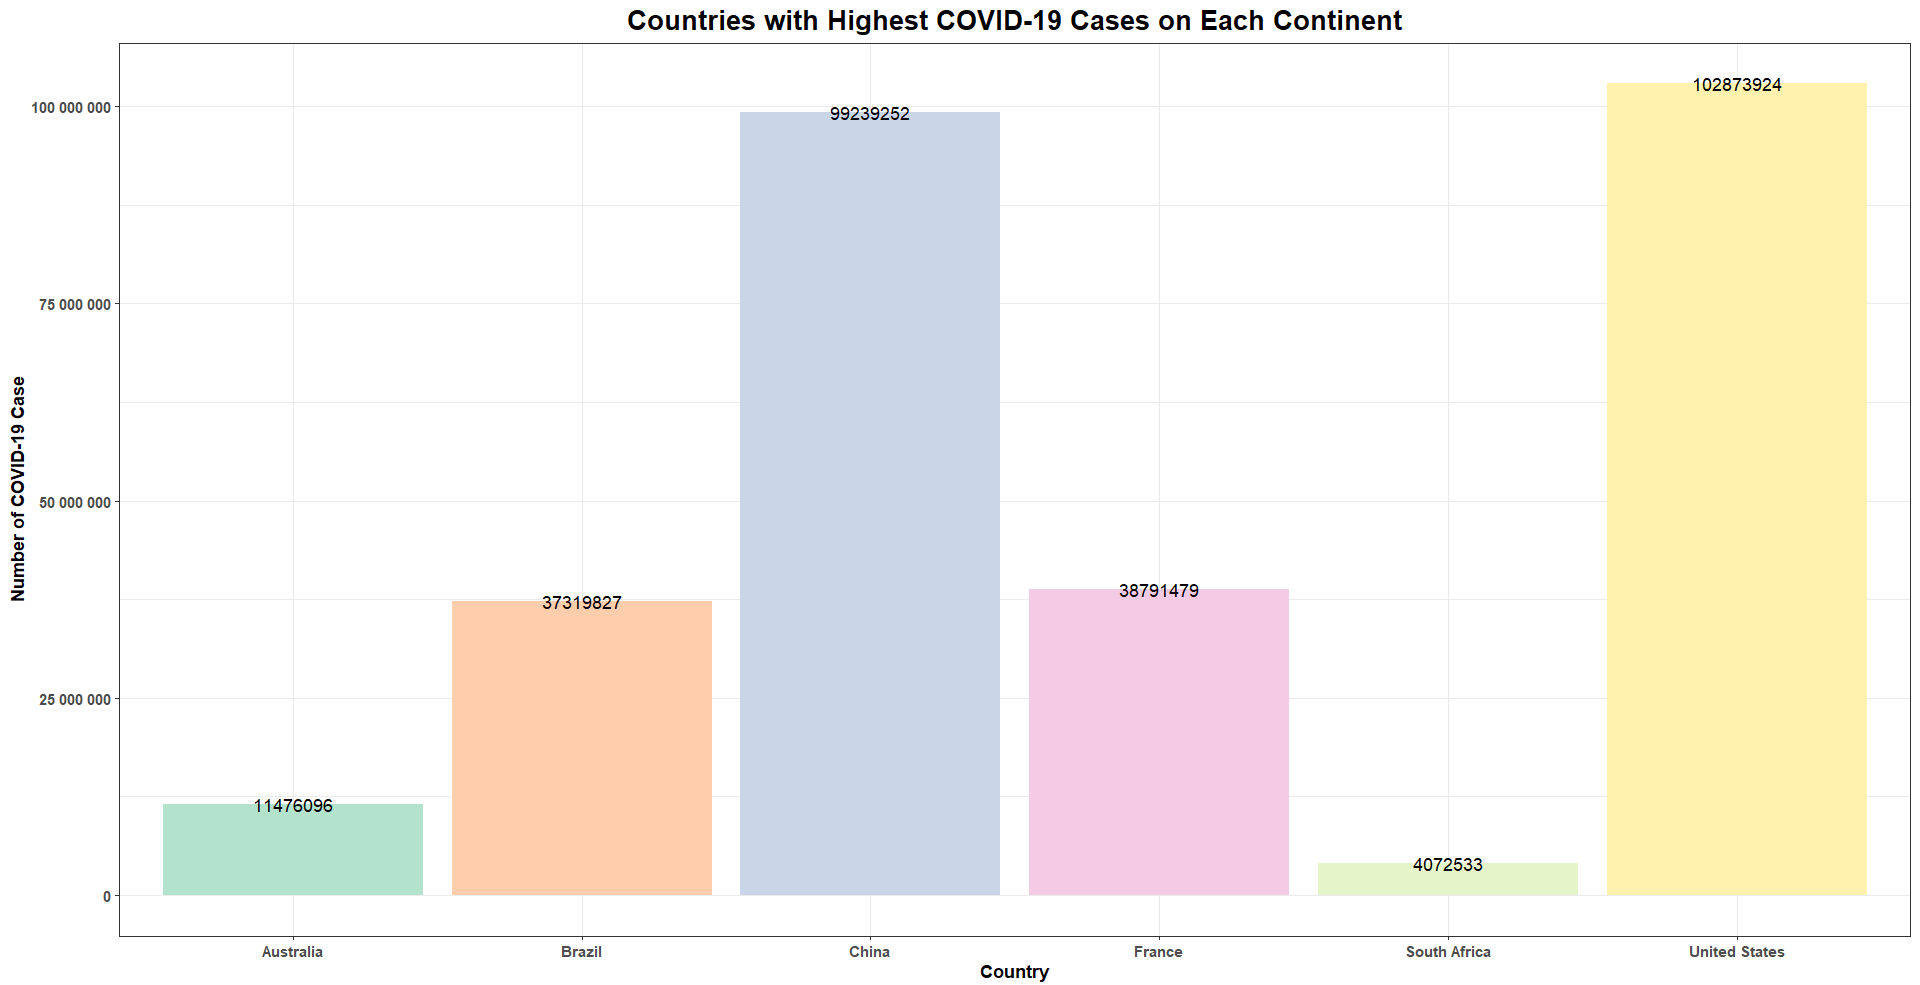

<div style="text-align: justify"> 
$\;\;\;\;\;$ The bar graph displays the countries with highest COVID-19 cases on each continent. The United States hold the most COVID-19 cases, representing a total of 102,873,924. However, the country with the second highest total COVID-19 cases, which is China with 99,239,252 COVID-19 cases, has the smallest difference compared to the number of COVID-19 cases in the United States. Conversely, even though South Africa has the highest number of COVID-19 cases on the African continent, it holds the least number of COVID-19 cases among the countries with highest COVID-19 cases on each continent, representing a total of 4,072,533 COVID-19 cases.  
</div> 

#### 2.2 The impact of vaccination on the COVID-19 disease in Australia by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

aust_new_cases_n_vaccinations = cov_data %>%
  filter(country == "Australia") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(aust_total_cases_by_year = sum(new_cases), aust_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(aust_new_cases_n_vaccinations, aes(x = year)) +
  geom_line(aes(y = aust_total_cases_by_year, color = "Covid Cases"), linewidth = 0.8) +
  geom_line(aes(y = aust_total_vaccinations_by_year, color = "Vaccinations"), linewidth = 0.8) +
  geom_point(aes(y = aust_total_cases_by_year, color = "Covid Cases"), size = 3) +
  geom_point(aes(y = aust_total_vaccinations_by_year, color = "Vaccinations"), size = 3) +
  geom_text(data = aust_new_cases_n_vaccinations, aes(x = year, y = aust_total_cases_by_year, 
                                                      label = aust_total_cases_by_year, vjust = -0.9), 
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = aust_new_cases_n_vaccinations, aes(x = year, y = aust_total_vaccinations_by_year, 
                                                      label = ifelse(aust_total_vaccinations_by_year != 0, 
                                                                     aust_total_vaccinations_by_year, ""), 
                                                      vjust = -0.9), color = "blue", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in Australia by Year") +
  labs(x = "Year", y = "", colour = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_y_continuous(labels = scales::number_format(scale = 1))

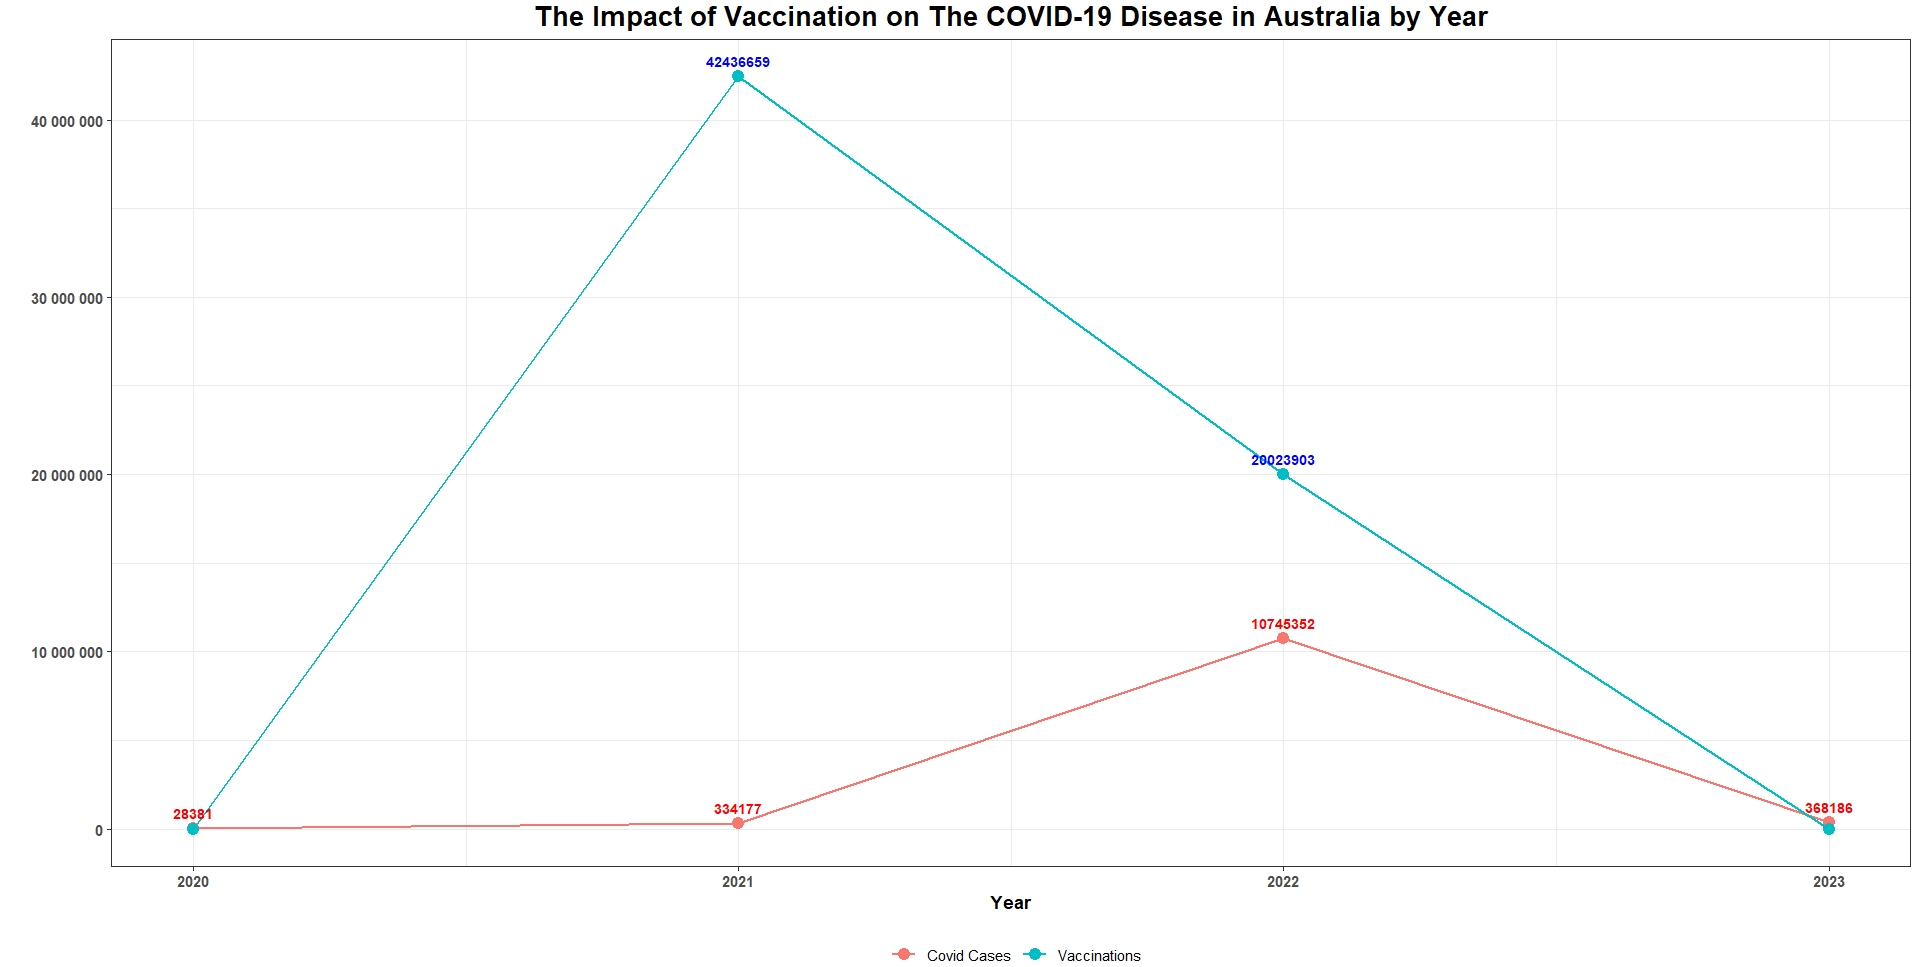

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graph displays the impact of vaccination on the COVID-19 Disease in Australia by year. The red line represents the COVID-19 cases, while the blue line represents the number of vaccinations administered. Since 2020, the COVID-19 cases in Australia have been exponentially increasing in subsequent years. In 2022, Australia reached its highest peak of COVID-19 cases, representing a total of 10,745,352 cases. However, vaccinations have had a significant impact on Australia's COVID-19 disease. The blue line, representing the number of vaccinations, shows that vaccinations were administered to Australian from 2021 and continued in the following years. As a result, COVID-19 cases significantly dropped in 2023, which helped maintain lower risk in Australia's COVID-19 disease.
</div> 

#### 2.3 The impact of vaccination on the COVID-19 disease in Brazil by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

brazil_new_cases_n_vaccinations = cov_data %>%
  filter(country == "Brazil") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(bra_total_cases_by_year = sum(new_cases), bra_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(brazil_new_cases_n_vaccinations, aes(x = year)) +
  geom_bar(aes(y = bra_total_cases_by_year, fill = "Covid Cases"), stat = "identity", width = 1, alpha = 0.5) +
  geom_bar(aes(y = bra_total_vaccinations_by_year, fill = "Vaccinations"), stat = "identity", width = 1, alpha = 0.3) +
  geom_text(data = brazil_new_cases_n_vaccinations, aes(x = year, y = bra_total_cases_by_year, 
                                                        label = bra_total_cases_by_year, vjust = -0.5),
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = brazil_new_cases_n_vaccinations, aes(x = year, y = bra_total_vaccinations_by_year, 
                                                        label = ifelse(bra_total_vaccinations_by_year != 0, 
                                                                       bra_total_vaccinations_by_year, ""), 
                                                        vjust = -1.2), color = "darkgreen", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in Brazil by Year") +
  labs(x = "Year", y = "", fill = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_fill_manual(values = c("Covid Cases" = "red", "Vaccinations" = "green")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

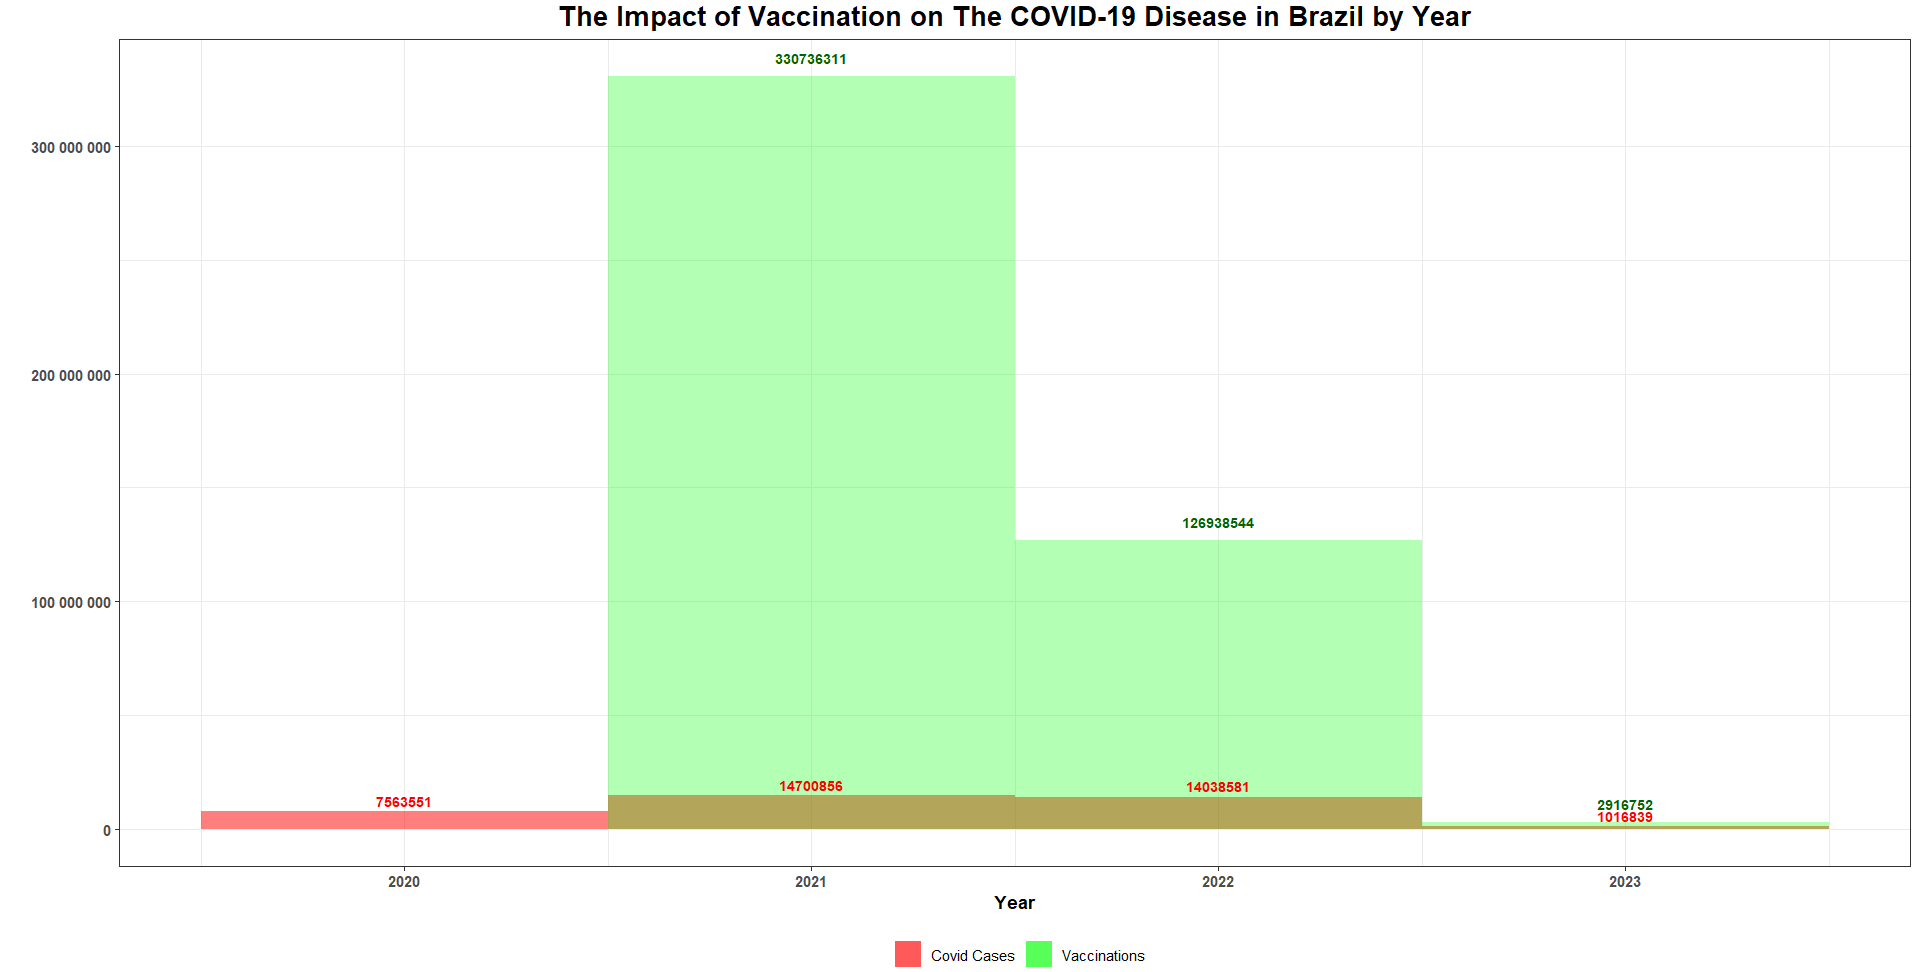

<div style="text-align: justify"> 
$\;\;\;\;\;$ The histogram displays the impact of vaccination on the COVID-19 disease in Brazil by year. The red histogram displays the number of COVID-19 cases, while the green histogram displays the number of vaccinations administered. Since 2020, COVID-19 cases in Brazil have been exponentially increasing in subsequent years. In 2021, Brazil reached its highest peak of COVID-19 cases, with a total of 14,700,856 cases. In contrast, approximately 330,736,311 vaccinations were administered to Brazilian in 2021. However, the vaccinations that were administered had a less significant impact as the COVID-19 cases did not decelerate in the subsequent year of 2022, as Brazil reached the second-highest peak of COVID-19 cases, with a total of 14,038,581 cases. Nevertheless, the administered vaccinations had an extreme impact on the COVID-19 disease in 2023, as Brazil's COVID-19 cases significantly dropped, reaching a total of 1,016,839 cases.
</div> 

#### 2.4 The impact of vaccination on the COVID-19 disease in China by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

china_new_cases_n_vaccinations = cov_data %>%
  filter(country == "China") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(china_total_cases_by_year = sum(new_cases), china_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(china_new_cases_n_vaccinations, aes(x = year)) +
  geom_line(aes(y = china_total_cases_by_year, color = "Covid Cases"), linewidth = 0.8) +
  geom_line(aes(y = china_total_vaccinations_by_year, color = "Vaccinations"), linewidth = 0.8) +
  geom_point(aes(y = china_total_cases_by_year, color = "Covid Cases"), size = 3) +
  geom_point(aes(y = china_total_vaccinations_by_year, color = "Vaccinations"), size = 3) +
  geom_text(data = china_new_cases_n_vaccinations, aes(x = year, y = china_total_cases_by_year, 
                                                       label = china_total_cases_by_year, vjust = -2), 
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = china_new_cases_n_vaccinations, aes(x = year, y = china_total_vaccinations_by_year, 
                                                       label = ifelse(china_total_vaccinations_by_year != 0, 
                                                                      china_total_vaccinations_by_year, ""), 
                                                       vjust = -0.9), color = "blue", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in China by Year") +
  labs(x = "Year", y = "", colour = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_y_continuous(labels = scales::number_format(scale = 1))

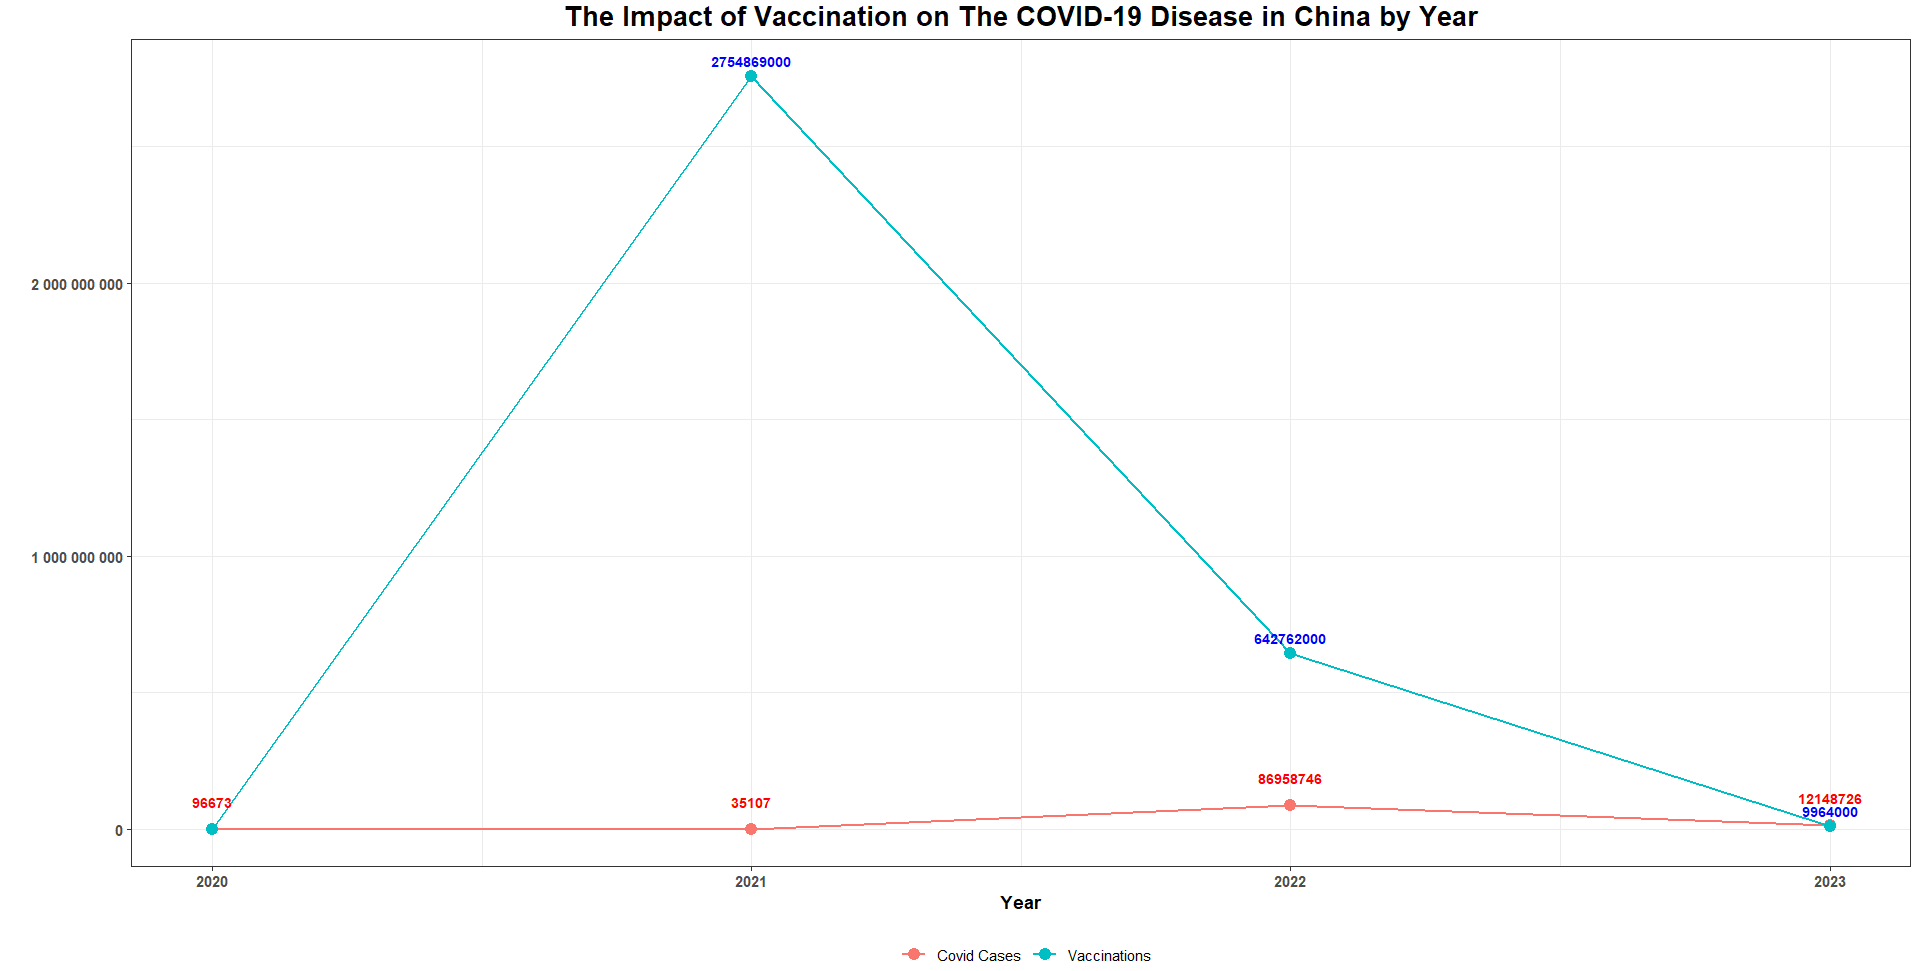

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graph displays the impact of vaccination on the COVID-19 disease in China by year. The red line represents the COVID-19 cases, while the blue line represents the number of vaccinations administered. In 2020, China reported a total of 96,673 COVID-19 cases. In the subsequent year of 2021, an approximately 2,754,869,000 vaccinations were administered to Chinese population, causing a significant drop in COVID-19 cases to a total of 35,107. Nonetheless, in the subsequent of 2022, the COVID-19 cases surged, reaching a total of 86,958,746 cases. The reason behind this could that the impact of vaccinations were less significant. However, in the year 2023, vaccinations started to have a positive impact on the COVID-19 disease, as the COVID-19 cases dropped to a total of 12,148,726 cases. 
</div> 

#### 2.5 The impact of vaccination on the COVID-19 disease in France by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

france_new_cases_n_vaccinations = cov_data %>%
  filter(country == "France") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(fran_total_cases_by_year = sum(new_cases), fran_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(france_new_cases_n_vaccinations, aes(x = year)) +
  geom_bar(aes(y = fran_total_cases_by_year, fill = "Covid Cases"), stat = "identity", width = 1, alpha = 0.5) +
  geom_bar(aes(y = fran_total_vaccinations_by_year, fill = "Vaccinations"), stat = "identity", width = 1, alpha = 0.3) +
  geom_text(data = france_new_cases_n_vaccinations, aes(x = year, y = fran_total_cases_by_year, label = 
                                                          fran_total_cases_by_year, vjust = -1.8),
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = france_new_cases_n_vaccinations, aes(x = year, y = fran_total_vaccinations_by_year, 
                                                        label = fran_total_vaccinations_by_year, vjust = -0.3),
            color = "darkgreen", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in France by Year") +
  labs(x = "Year", y = "", fill = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_fill_manual(values = c("Covid Cases" = "red", "Vaccinations" = "green")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

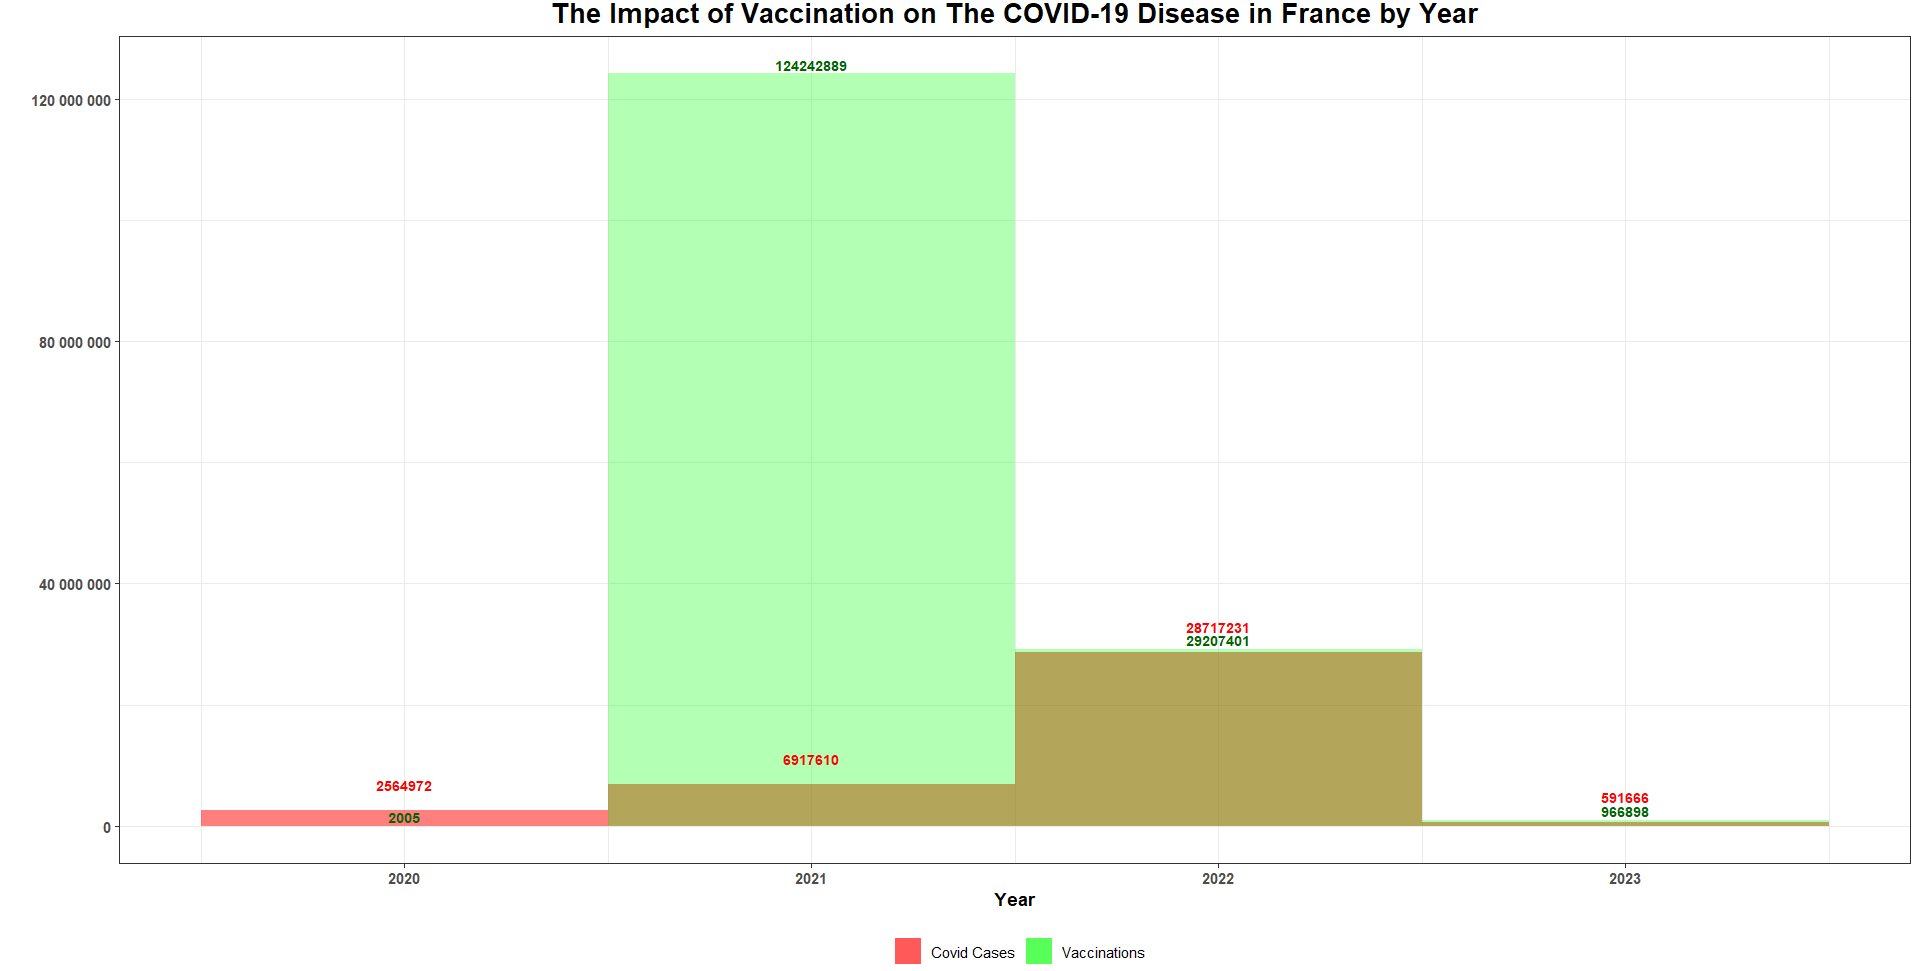

<div style="text-align: justify"> 
$\;\;\;\;\;$ The histogram displays the impact of vaccination on the COVID-19 disease in France by year. The red histogram displays the number of COVID-19 cases, while the green histogram displays the number of vaccinations administered. In the year 2020, France reported a significant number of COVID-19 cases, reaching a total of 2,564,972 cases. Despite this, France was one of the countries to receive preventive vaccinations in 2020. However, the impact of vaccinations in 2020 was less significant, as the number of COVID-19 cases increased to a total of 6,917,610 cases in the subsequent year of 2021. During that year, approximately 124,242,889 vaccinations were administered to French population. Nonetheless, in the subsequent year of 2022, COVID-19 cases surged, reaching a total of 28,717,231 cases, which could be attributed to the less significant impact on the COVID-19 disease. In the year 2023, vaccinations started to have a pisitive impact, causing the number of COVID-19 cases to drop to a total of 591,688 cases.
</div>

#### 2.6 The impact of vaccination on the COVID-19 disease in South Africa by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

safrica_new_cases_n_vaccinations = cov_data %>%
  filter(country == "South Africa") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(sa_total_cases_by_year = sum(new_cases), sa_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(safrica_new_cases_n_vaccinations, aes(x = year)) +
  geom_line(aes(y = sa_total_cases_by_year, color = "Covid Cases"), linewidth = 0.8) +
  geom_line(aes(y = sa_total_vaccinations_by_year, color = "Vaccinations"), linewidth = 0.8) +
  geom_point(aes(y = sa_total_cases_by_year, color = "Covid Cases"), size = 3) +
  geom_point(aes(y = sa_total_vaccinations_by_year, color = "Vaccinations"), size = 3) +
  geom_text(data = safrica_new_cases_n_vaccinations, aes(x = year, y = sa_total_cases_by_year, 
                                                         label = sa_total_cases_by_year, vjust = -0.9), 
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = safrica_new_cases_n_vaccinations, aes(x = year, y = sa_total_vaccinations_by_year, 
                                                         label = ifelse(sa_total_vaccinations_by_year != 0, 
                                                                        sa_total_vaccinations_by_year, ""), 
                                                         vjust = -0.9), color = "blue", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in South Africa by Year") +
  labs(x = "Year", y = "", colour = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_y_continuous(labels = scales::number_format(scale = 1))

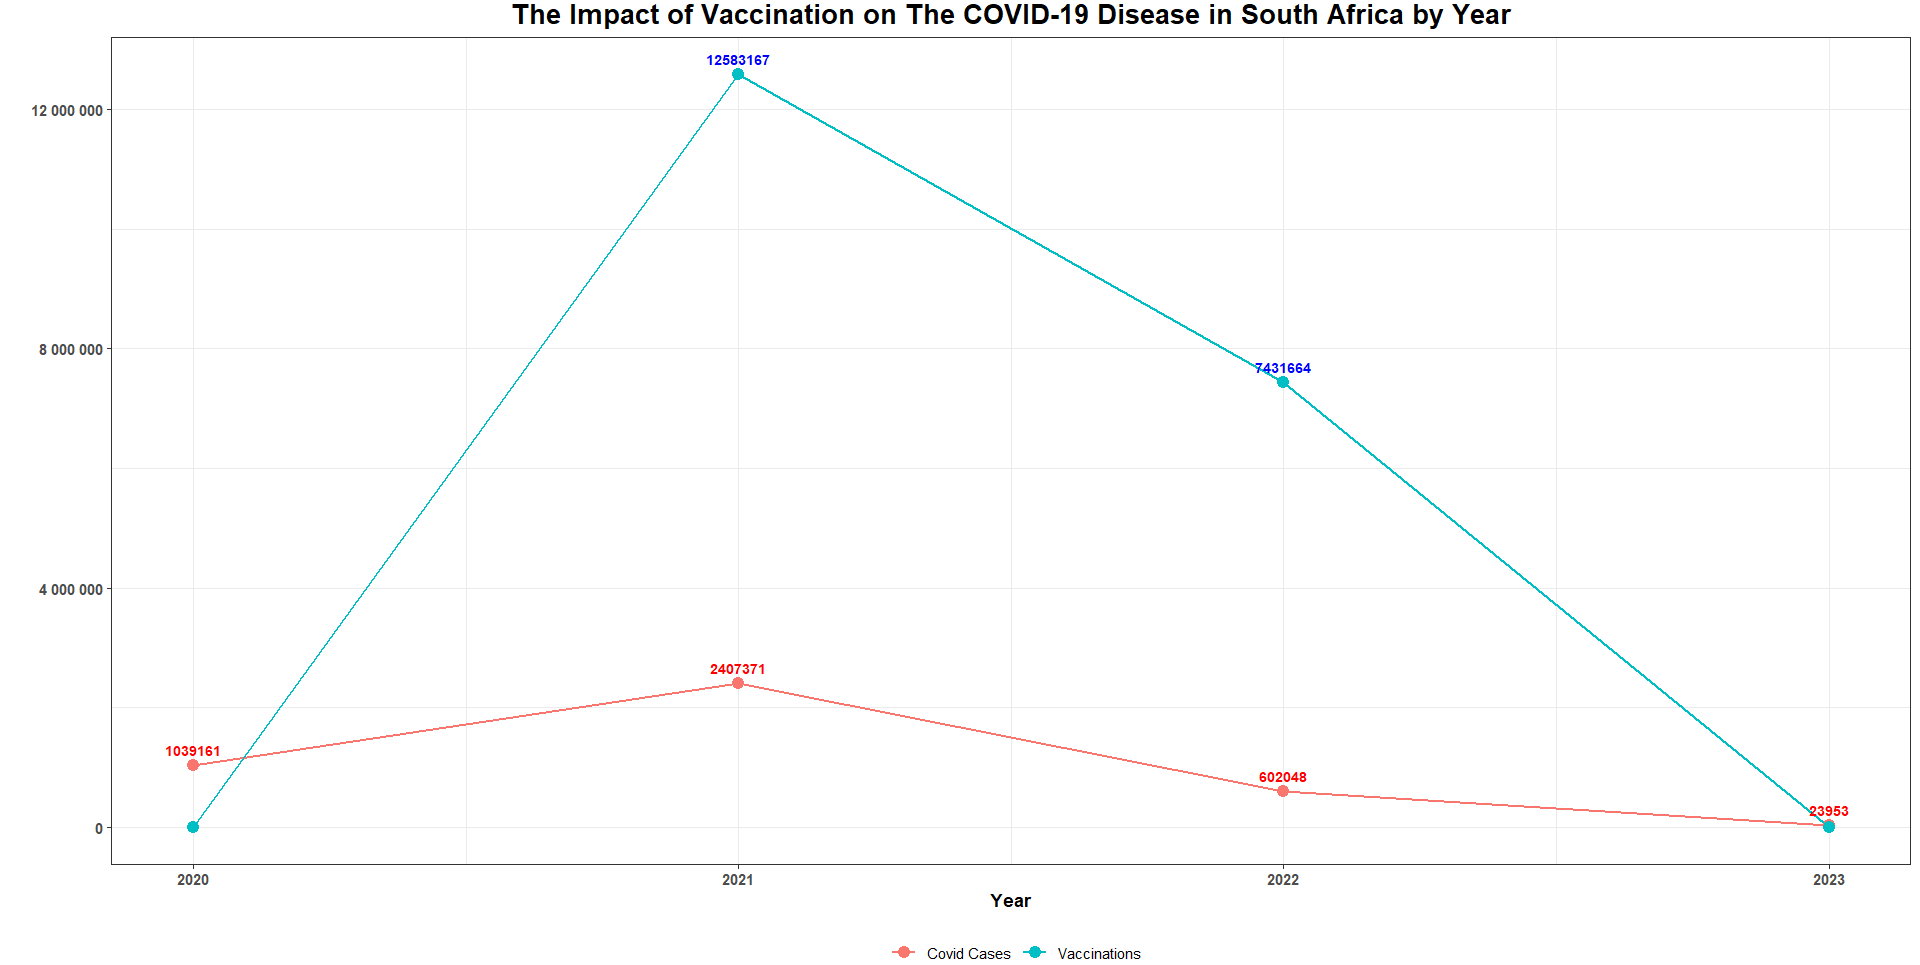

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graph displays the impact of vaccination on the COVID-19 disease in South Africa by year. The red line represents the COVID-19 cases, while the blue line represents the number of vaccinations administered. From the year 2020 to 2021, the COVID-19 cases significantly increased due to unavailable preventive vaccinations administered to the African population, reaching a total of 2,407,371 cases from 1,039,161 cases. During the year 2021, approximately 12,583,167 vaccinations were administered to the African population. The administered vaccinations had significant impacts in the subsequent years of 2022 and 2023, as the number of COVID-19 cases dropped in the following years. 
</div> 

#### 2.7 The impact of vaccination on the COVID-19 disease in United States by year

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

us_new_cases_n_vaccinations = cov_data %>%
  filter(country == "United States") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(us_total_cases_by_year = sum(new_cases), us_total_vaccinations_by_year = sum(new_vaccinations))

ggplot(us_new_cases_n_vaccinations, aes(x = year)) +
  geom_bar(aes(y = us_total_cases_by_year, fill = "Covid Cases"), stat = "identity", width = 1, alpha = 0.5) +
  geom_bar(aes(y = us_total_vaccinations_by_year, fill = "Vaccinations"), stat = "identity", width = 1, alpha = 0.3) +
  geom_text(data = us_new_cases_n_vaccinations, aes(x = year, y = us_total_cases_by_year, label = 
                                                      us_total_cases_by_year, vjust = -1.8),
            color = "red", fontface = "bold", size = 3) +
  geom_text(data = us_new_cases_n_vaccinations, aes(x = year, y = us_total_vaccinations_by_year, 
                                                    label = us_total_vaccinations_by_year, vjust = -0.3),
            color = "darkgreen", fontface = "bold", size = 3) +
  ggtitle("The Impact of Vaccination on The COVID-19 Disease in United States by Year") +
  labs(x = "Year", y = "", fill = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "bottom") +
  scale_fill_manual(values = c("Covid Cases" = "red", "Vaccinations" = "green")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

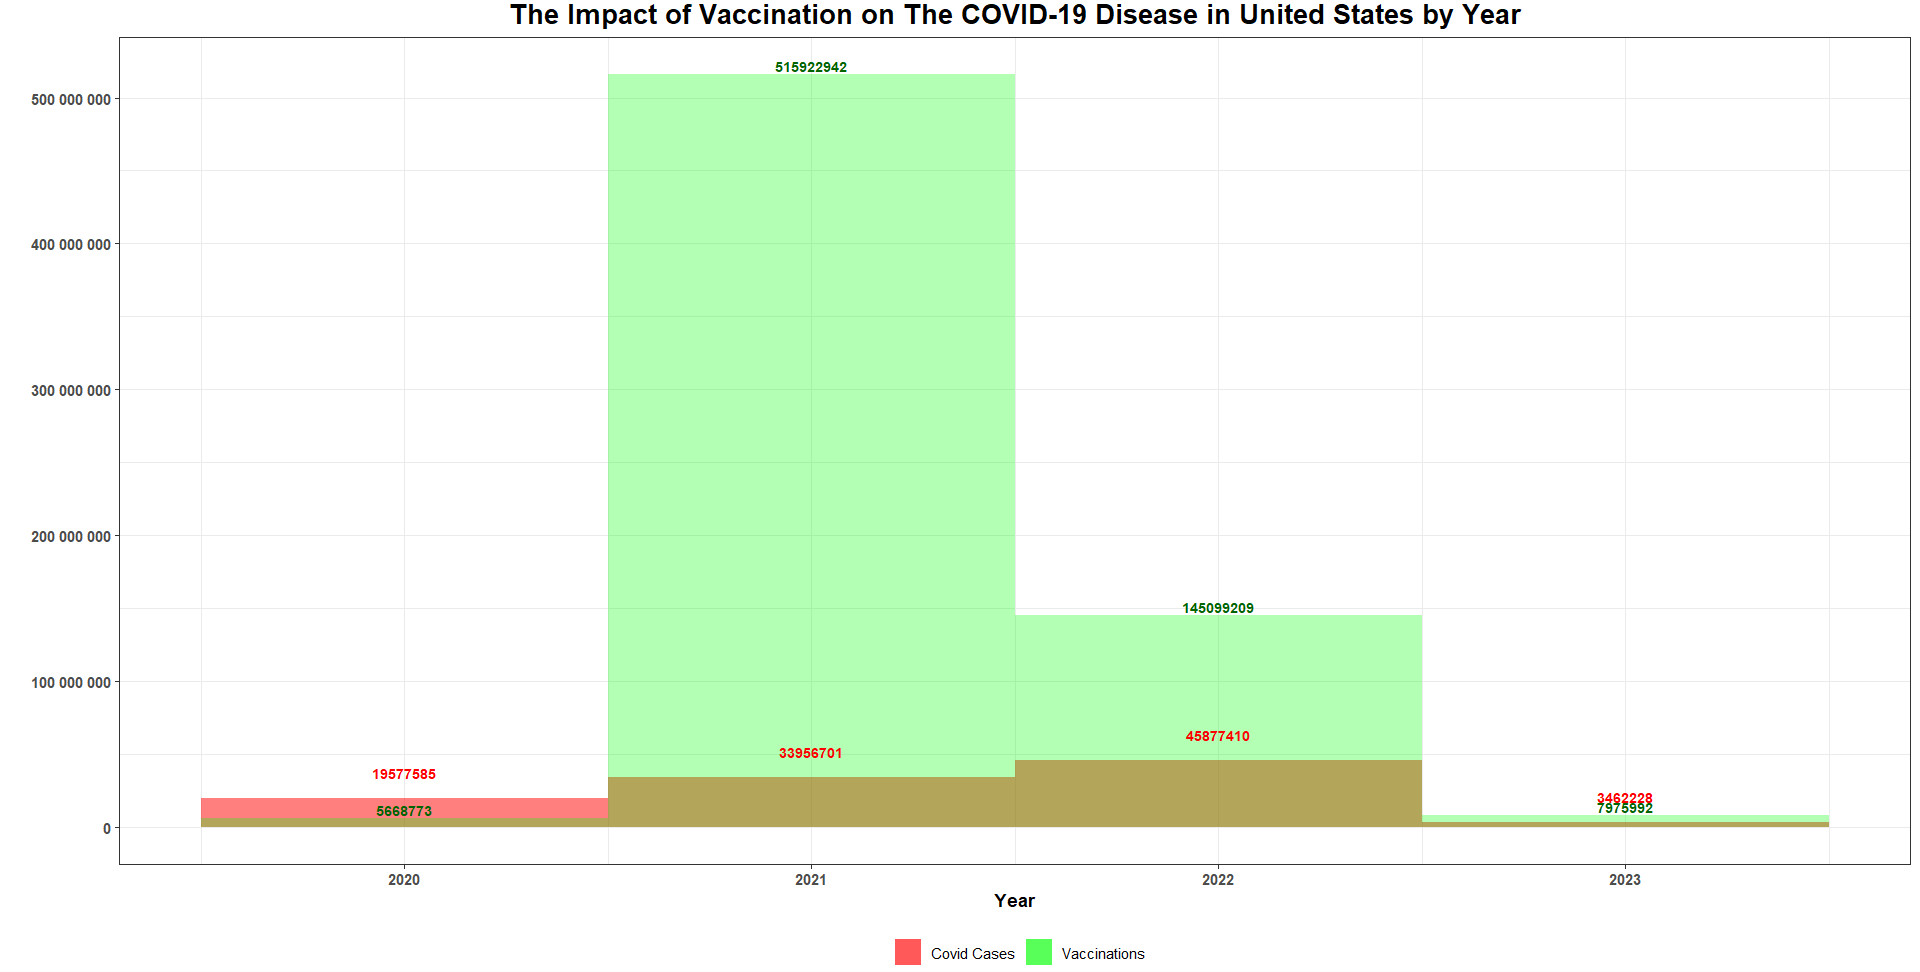

<div style="text-align: justify"> 
$\;\;\;\;\;$ The histogram displays the impact of vaccination on the COVID-19 disease in United States by year. The red histogram displays the number of COVID-19 cases, while the green histogram displays the number of vaccinations administered. United States reported an exponential increase in COVID-19 cases from the subsequent year of 2020 to 2022, despite being one of the countries that received preventive vaccinations in 2020. The reason behind this could be attributed to the less significant impact of vaccinations. However, the impact of vaccinations started to improve in the subsequent year of 2023. 
</div>

### <font color='red'> Findings [Question 2]: </font> 

<div style="text-align: justify"> 
$\;\;\;\;\;$ The United States contributed the highest number of COVID-19 cases among all the countries with highest COVID-19 cases on each continent. Following the country with second highest number of COVID-19 cases is China. In light of this,  vaccinations had a positive impact on mitigating lower risk in COVID-19 disease, as all the countries with highest COVID-19 cases on each continent reported a deceleration of COVID-19 cases from the year 2022 to 2023. Additionally, the United States and France were the countries that received the administration of preventive vaccinations in the first quarter of the pandemic. <br>
<br>
$\;\;\;\;\;$ According to Chad P.Bown, United States made hundreds of millions of doses of safe and effective Pfizer-BioNTech and Moderna COVID-19 vaccines available by early 2021, a little more than a year after the pandemic began. In lieu of that, the Pfrizer-BioNTech and Moderna expanded their operations to produce more vaccines in Europe for the European population and the country received doses early because the European Union commission approved the administration of Pfizer-BioNTech COVID-19 vaccine on 21 December 2020 and deployed on 27 December 2020. The United States got doses early because the Defense Production Act (DPA) of 1950 "priority-rated" contracts agreed to in 2020 allowed the US government to take on some of the financial risk to encourage vaccine companies to invest in costly production facilities without knowing whether the Food and Drug Administration (FDA) would authorize their vaccines for use. Nevertheless, the FDA issued the first emergency use authorization (EUA) for a vaccine for the prevention of COVID-19 disease in individuals 16 years of age and older. <br>
<br>    
$\;\;\;\;\;$ In the year 2021, individuals were encouraged to receive two original doses of the vaccine to complete the full regimen. The original doses were primarily focused on helping individuals' immune systems to recognize and produce antibodies against the virus they were created to defend against. However, numerous parents refused, delayed, or hesitated to vaccinate their children and themselves for reasons falling into 4 categories: religious reasons, personal beliefs or philosophial reasons, safety concerns, and a desire for more information from healthcare providers. The consequences of vaccine hesitancy affected the ability to control the spread of the virus, resulting in elevated risks of severe cases in the years 2021 and 2022. As time passed, more and more of the individuals became determined to believe in the effectiveness of taking the vaccines, which subsequently mitigated the risk of positive cases in countries in the subsequent years. Moreover, the booster vaccination were introduced in the second quarter of the pandemic. The booster shots were primarily focused on helping individuals body's immune system combat the virus effectively. According to the visualizations of the impact of vaccination on the countries with highest COVID-19 cases on each continent, most of the population of those countries received their booster shots in the years 2022 and 2023. As a results, all the country had the fewest COVID-19 cases by 2023. <br>
<br>
$\;\;\;\;\;$ To encourage people to take vaccinations and boosters, it is essential to implement a multifaceted approach that addresses both individual and collective benefits. Firstly, we must prioritize widespread public education campaigns that disseminate accurate and up-to-date information about the safety, efficacy, and importance of boosters in maintaining immunity over time. Leveraging trusted healthcare professionals, community leaders, and public figures can help build trust and credibility. Additionally, making vaccinations and boosters easily accessible by setting up vaccination centers in various locations, including remote areas, workplaces, and schools, can remove barriers to access. Employers can also play a role by supporting and incentivizing their employees to get vaccinated and receive booster shots. Employing digital tools and platforms to send timely reminders and personalized information can further enhance vaccine uptake.
</div> 

### <div style="text-align: justify"> Question 3: In comparison between Malaysia and United States, which and how the country outperforms the other country during the COVID-19 pandemic?</div>

#### 3.1 Malaysia vs United States: COVID-19 Stats Comparison

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)

# Malaysia Statistics
malaysia_overview = cov_data %>%
  filter(country == "Malaysia") %>%
  summarize(population = mean(population), total_cases = sum(new_cases), total_deaths = sum(new_deaths)) %>%
  mutate(death_rates = round(total_deaths / population * 100, 2)) %>%
  mutate(proportion_of_infected_population = round(total_cases / population * 100, 2))

df_malaysia <- data.frame(
  variable = c("Population", "Total Cases", "Total Deaths"),
  value = c(malaysia_overview$population, malaysia_overview$total_cases, malaysia_overview$total_deaths)
)

malaysia_plot <- ggplot(df_malaysia, aes(x = variable, y = value, fill = variable)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = value), vjust = -0.3, colour = c("lightgreen","lightpink","red") ,size = 3.5, fontface = "bold") +
  ggtitle("Malaysia") +
  theme_bw() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        axis.title = element_blank()) +
  scale_fill_manual(values = c("lightgreen","lightpink","red")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

malaysia_statistics <- malaysia_overview %>%
  reframe(Death_Rates = death_rates, Proportion_Of_Infected_Population = proportion_of_infected_population)

malaysia_statistics_table <- tableGrob(malaysia_statistics)  

malaysia_final_plot <- grid.arrange(malaysia_plot, malaysia_statistics_table, ncol = 2)

# United States Statistics
united_states_overview = cov_data %>%
  filter(country == "United States") %>%
  summarize(population = mean(population), total_cases = sum(new_cases), total_deaths = sum(new_deaths)) %>%
  mutate(death_rates = round(total_deaths / population * 100, 2)) %>%
  mutate(proportion_of_infected_population = round(total_cases / population * 100, 2))

df_united_states <- data.frame(
  variable = c("Population", "Total Cases", "Total Deaths"),
  value = c(united_states_overview$population, united_states_overview$total_cases, united_states_overview$total_deaths)
)

united_states_plot <- ggplot(df_united_states, aes(x = variable, y = value, fill = variable)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = value), vjust = -0.3, colour = c("lightgreen","lightpink","red") ,size = 3.5, fontface = "bold") +
  ggtitle("United States") +
  theme_bw() +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        axis.title = element_blank()) +
  scale_fill_manual(values = c("lightgreen","lightpink","red")) +
  scale_y_continuous(labels = scales::number_format(scale = 1))

united_states_statistics <- united_states_overview %>%
  reframe(Death_Rates = death_rates, Proportion_Of_Infected_Population = proportion_of_infected_population)

united_states_statistics_table <- tableGrob(united_states_statistics) 

united_states_final_plot <- grid.arrange(united_states_plot, united_states_statistics_table, ncol = 2)

# Malaysia & United States Statistics
combined_plot <- grid.arrange(malaysia_final_plot, united_states_final_plot, ncol = 2)

title <- textGrob("Malaysia vs. United States: COVID-19 Stats Comparison", gp = gpar(fontface = "bold", fontsize = 16))

final_plot <- grid.arrange(title, combined_plot, ncol = 1, heights = c(0.1, 0.9))

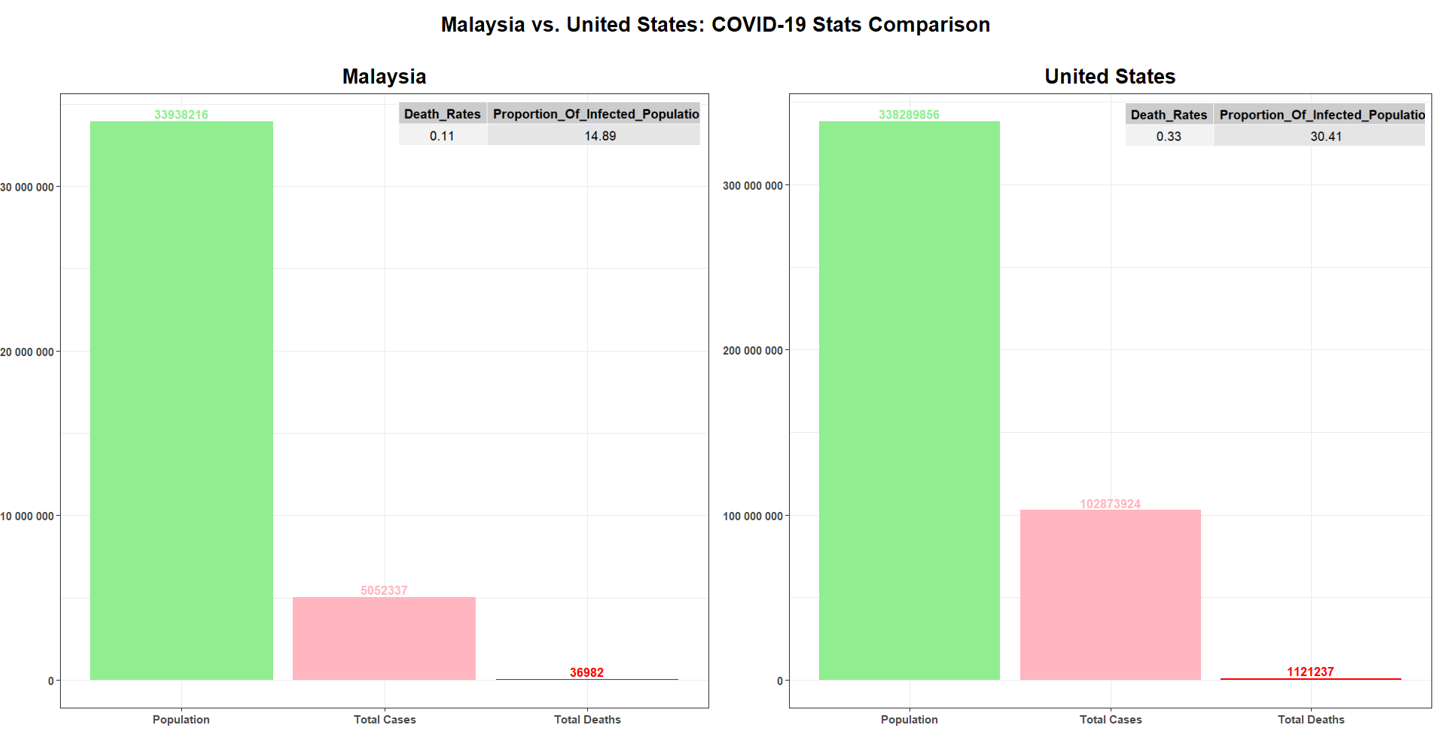

<div style="text-align: justify"> 
$\;\;\;\;\;$ The bar graphs display the Malaysia vs. United States: COVID-19 stats comparison in terms of the death rates, proportions of infected population, population of the countries, total COVID-19 cases, and the total deaths. Firstly, the population of the United States is significantly higher than the Malaysia's population, reaching a total of 338,289,856 citizens in the United States and 33,938,216 citizens in the Malaysia. Regarding the total COVID-19 cases in each country, the United States holds the higher number and proportion of COVID-19 cases, representing a total of 102,873,942 cases which is approximately 30.41% of the population. Meanwhile, Malaysia has a total of 5,052,337 cases which is approximately 14.89% of the population. In regards to the total deaths from COVID-19 in each country, the United States also holds the higher number and proportion of deaths, with a total of 1,121,237 deaths, which is approximately 0.33% of the population. Whereas, Malaysia has a total of 36,982 deaths, approximately 0.11% of the population.       
</div>

#### 3.2 Malaysia vs. United States: Total Cases by Years Comparison

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Malaysia Statistic
malaysia_new_cases = cov_data %>%
  filter(country == "Malaysia") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(malaysia_total_cases_by_year = sum(new_cases))

malaysia_cases_plot <- ggplot(malaysia_new_cases, aes(x = year)) +
  geom_line(aes(y = malaysia_total_cases_by_year, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = malaysia_total_cases_by_year, color = "Covid Cases"), size = 3) +
  geom_text(data = malaysia_new_cases, aes(x = year, y = malaysia_total_cases_by_year, 
                                           label = malaysia_total_cases_by_year, vjust = -0.9), 
            color = "red", fontface = "bold", size = 3) +
  ggtitle("Malaysia") +
  labs(x = "Year", y = "", colour = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  scale_y_continuous(labels = scales::number_format(scale = 1))

# United States Statistic
us_new_cases = cov_data %>%
  filter(country == "United States") %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarize(us_total_cases_by_year = sum(new_cases))

us_cases_plot <- ggplot(us_new_cases, aes(x = year)) +
  geom_line(aes(y = us_total_cases_by_year, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = us_total_cases_by_year, color = "Covid Cases"), size = 3) +
  geom_text(data = us_new_cases, aes(x = year, y = us_total_cases_by_year, 
                                     label = us_total_cases_by_year, vjust = -0.9), 
            color = "red", fontface = "bold", size = 3) +
  ggtitle("United States") +
  labs(x = "Year", y = "", colour = "") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  scale_y_continuous(labels = scales::number_format(scale = 1)) 

# Malaysia & United States Statistics
malaysia_us_cases_combined_plot <- grid.arrange(malaysia_cases_plot, us_cases_plot, ncol = 2)

cases_title <- textGrob("Malaysia vs. United States: Total Cases by Year Comparison", gp = gpar(fontface = "bold", 
                                                                                                fontsize = 16))

final_plot <- grid.arrange(cases_title, malaysia_us_cases_combined_plot, ncol = 1, heights = c(0.1, 0.9))

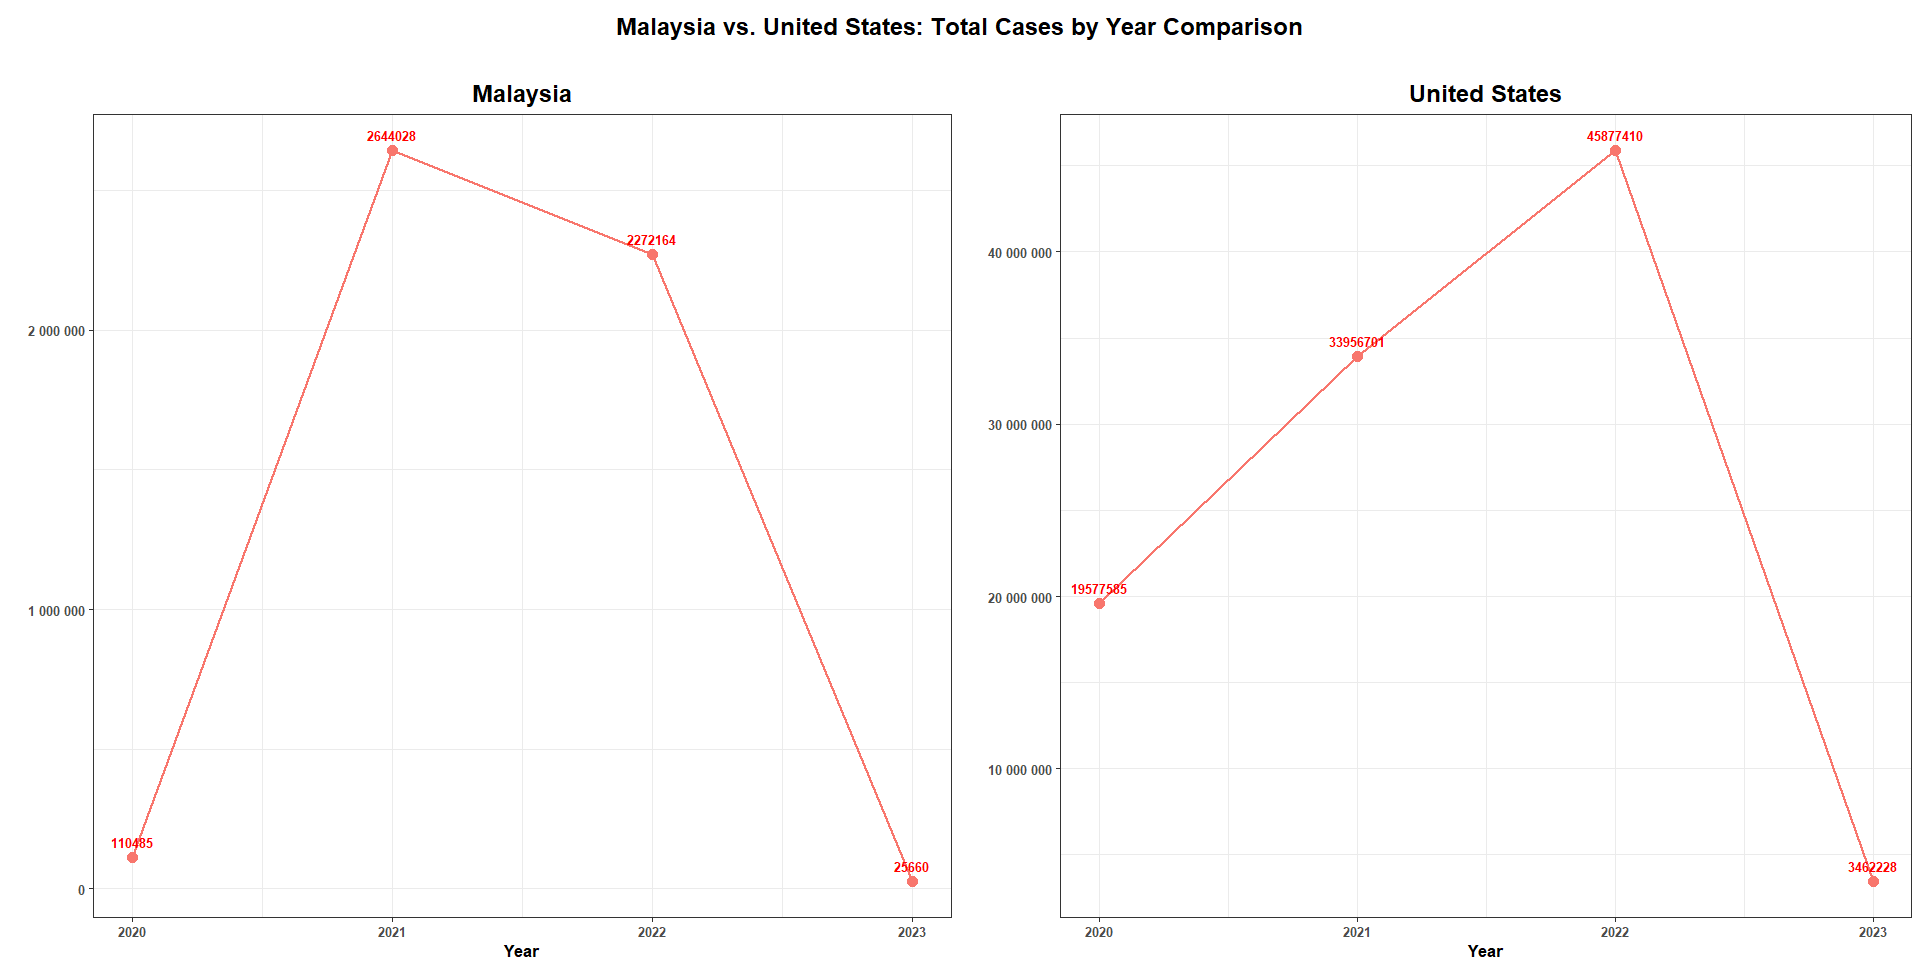

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graphs display the Malaysia vs. United States: total cases by year comparison. The COVID-19 cases in Malaysia had skyrocketed from the year 2020 to 2021 and subsequently dropped in the following years of 2022 and 2023. Whereas, the United States had skyrocketed its COVID-19 cases in the beginning of three years of 2020, 2021, 2022 and subsequently dropped in the year of 2023.  
</div>

#### 3.3 The effect of stringency measures on COVID-19 cases in Malaysia (2020-2022)

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# Malaysia 2020 total cases and stringency index by month
malaysia_new_cases_2020 = cov_data %>%
  filter(country == "Malaysia" & year(date) == 2020) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(malaysia_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

malaysia_new_cases_2020_plot <- ggplot(malaysia_new_cases_2020, aes(x = month, group = 1)) +
  geom_line(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = malaysia_new_cases_2020, aes(x = month, y = malaysia_total_cases_by_month, 
                                                label = malaysia_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2020", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,800000)
  
malaysia_stringency_index_2020 = malaysia_new_cases_2020 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

malaysia_stringency_index_2020_table = tableGrob(malaysia_stringency_index_2020)

malaysia_new_cases_n_stringency_index_2020 = grid.arrange(malaysia_new_cases_2020_plot, malaysia_stringency_index_2020_table, 
                                                          ncol = 2, widths = c(5, 1))
  
# Malaysia 2021 total cases and stringency index by month
malaysia_new_cases_2021 = cov_data %>%
  filter(country == "Malaysia" & year(date) == 2021) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(malaysia_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

malaysia_new_cases_2021_plot <- ggplot(malaysia_new_cases_2021, aes(x = month, group = 1)) +
  geom_line(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = malaysia_new_cases_2021, aes(x = month, y = malaysia_total_cases_by_month, 
                                                label = malaysia_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2021", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,800000)  

malaysia_stringency_index_2021 = malaysia_new_cases_2021 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

malaysia_stringency_index_2021_table = tableGrob(malaysia_stringency_index_2021)

malaysia_new_cases_n_stringency_index_2021 = grid.arrange(malaysia_new_cases_2021_plot, malaysia_stringency_index_2021_table, 
                                                          ncol = 2, widths = c(5, 1))

# Malaysia 2022 total cases and stringency index by month
malaysia_new_cases_2022 = cov_data %>%
  filter(country == "Malaysia" & year(date) == 2022) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(malaysia_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

malaysia_new_cases_2022_plot <- ggplot(malaysia_new_cases_2022, aes(x = month, group = 1)) +
  geom_line(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = malaysia_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = malaysia_new_cases_2022, aes(x = month, y = malaysia_total_cases_by_month, 
                                                label = malaysia_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2022", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,800000) 

malaysia_stringency_index_2022 = malaysia_new_cases_2022 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

malaysia_stringency_index_2022_table = tableGrob(malaysia_stringency_index_2022)

malaysia_new_cases_n_stringency_index_2022 = grid.arrange(malaysia_new_cases_2022_plot, malaysia_stringency_index_2022_table, 
                                                          ncol = 2, widths = c(5, 1))

# Combination of Malaysia 2020, 2021, 2022 total cases and stringency index by month
malaysia_new_cases_n_stringency_index_combined_plot = grid.arrange(malaysia_new_cases_n_stringency_index_2020,
                                                                   malaysia_new_cases_n_stringency_index_2021,
                                                                   malaysia_new_cases_n_stringency_index_2022, ncol = 3)

malaysia_new_cases_n_stringency_index_title <- textGrob("The effect of stringency measures on COVID-19 cases in Malaysia 
                                                        (2020-2022)", gp = gpar(fontface = "bold", fontsize = 16))

malaysia_new_cases_n_stringency_index_combined_final_plot <- grid.arrange(malaysia_new_cases_n_stringency_index_title,
                                                                          malaysia_new_cases_n_stringency_i

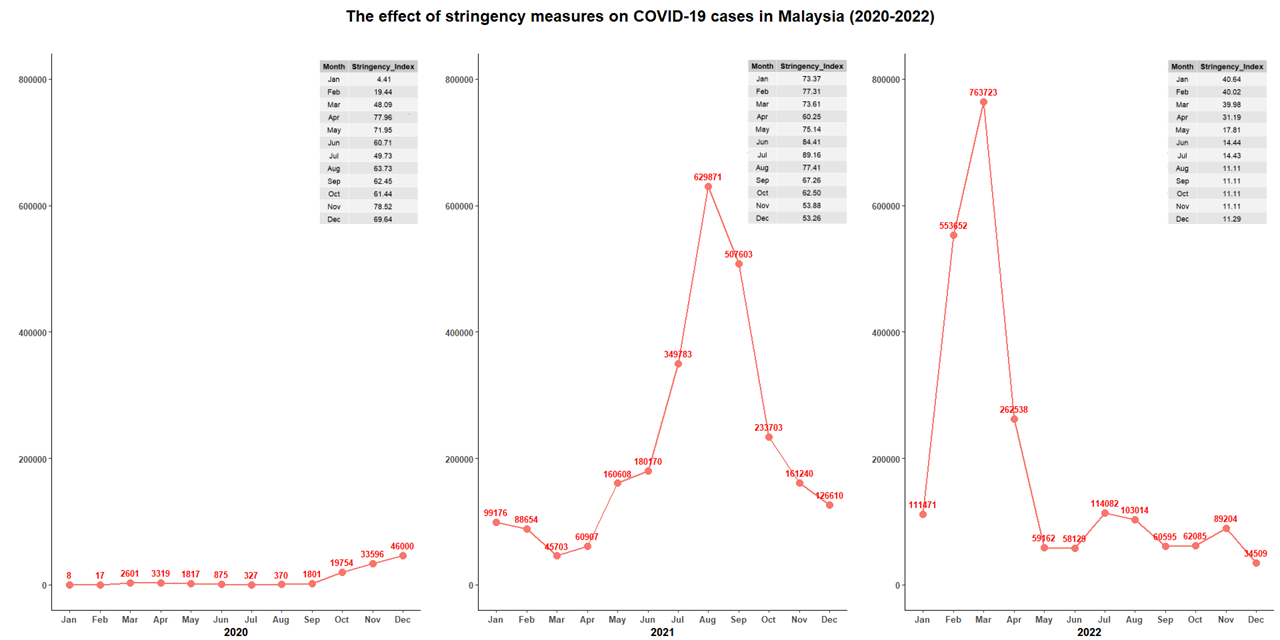

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graphs, along with the tables, display the effect of stringency measures on COVID-19 cases in Malaysia from 2020 to 2022. At the onset of the pandemic in 2020, Malaysia implemented stringent safety regulations to keep COVID-19 cases below 50,000. In 2021, the country maintained high stringency during the first three months. However, in April, the stringecy index dropped to 60.25, leading to a significant surge in COVID-19 cases that continued until August. Consequently, Malaysia decided to ease its safety regulations as cases decreased. However, this led to a resurgence of COVID-19 cases in January 2022, as the stringency of safety regulations was reduced during that time.
</div>

#### 3.4 The effect of stringency measures on COVID-19 cases in United States (2020-2022)

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)

# United States 2020 total cases and stringency index by month
us_new_cases_2020 = cov_data %>%
  filter(country == "United States" & year(date) == 2020) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(us_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

us_new_cases_2020_plot <- ggplot(us_new_cases_2020, aes(x = month, group = 1)) +
  geom_line(aes(y = us_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = us_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = us_new_cases_2020, aes(x = month, y = us_total_cases_by_month, 
                                                label = us_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2020", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,25000000)

options(scipen = 25000000)

us_stringency_index_2020 = us_new_cases_2020 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

us_stringency_index_2020_table = tableGrob(us_stringency_index_2020)

us_new_cases_n_stringency_index_2020 = grid.arrange(us_new_cases_2020_plot, us_stringency_index_2020_table, 
                                                          ncol = 2, widths = c(5, 1))

# United States 2021 total cases and stringency index by month
us_new_cases_2021 = cov_data %>%
  filter(country == "United States" & year(date) == 2021) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(us_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

us_new_cases_2021_plot <- ggplot(us_new_cases_2021, aes(x = month, group = 1)) +
  geom_line(aes(y = us_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = us_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = us_new_cases_2021, aes(x = month, y = us_total_cases_by_month, 
                                          label = us_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2021", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,25000000)

options(scipen = 25000000)

us_stringency_index_2021 = us_new_cases_2021 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

us_stringency_index_2021_table = tableGrob(us_stringency_index_2021)

us_new_cases_n_stringency_index_2021 = grid.arrange(us_new_cases_2021_plot, us_stringency_index_2021_table, 
                                                    ncol = 2, widths = c(5, 1))

# United States 2022 total cases and stringency index by month
us_new_cases_2022 = cov_data %>%
  filter(country == "United States" & year(date) == 2022) %>%
  mutate(month = factor(month(date), labels = month.abb)) %>%
  group_by(month) %>%
  summarize(us_total_cases_by_month = sum(new_cases), stringency_index = round(mean(stringency_index),2))

us_new_cases_2022_plot <- ggplot(us_new_cases_2022, aes(x = month, group = 1)) +
  geom_line(aes(y = us_total_cases_by_month, color = "Covid Cases"), linewidth = 0.8) +
  geom_point(aes(y = us_total_cases_by_month, color = "Covid Cases"), size = 3) + 
  geom_text(data = us_new_cases_2022, aes(x = month, y = us_total_cases_by_month, 
                                          label = us_total_cases_by_month, vjust = -0.9),
            color = "red", fontface = "bold", size = 3) +
  labs(x = "2022", y = "", colour = "") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        legend.title = element_text(face = "bold"),
        axis.title.x = element_text(face = "bold"),
        axis.text.x = element_text(face = "bold"),
        axis.text.y = element_text(face = "bold"),
        legend.position = "none") +
  ylim(0,25000000)

options(scipen = 25000000)

us_stringency_index_2022 = us_new_cases_2022 %>%
  reframe(Month = month, Stringency_Index = stringency_index)

us_stringency_index_2022_table = tableGrob(us_stringency_index_2022)

us_new_cases_n_stringency_index_2022 = grid.arrange(us_new_cases_2022_plot, us_stringency_index_2022_table, 
                                                    ncol = 2, widths = c(5, 1))

# Combination of United States 2020, 2021, 2022 total cases and stringency index by month
us_new_cases_n_stringency_index_combined_plot = grid.arrange(us_new_cases_n_stringency_index_2020,
                                                                   us_new_cases_n_stringency_index_2021,
                                                                   us_new_cases_n_stringency_index_2022, ncol = 3)

us_new_cases_n_stringency_index_title <- textGrob("The effect of stringency measures on COVID-19 cases in United States 
                                                  (2020-2022)", gp = gpar(fontface = "bold", fontsize = 16))

us_new_cases_n_stringency_index_combined_final_plot <- grid.arrange(us_new_cases_n_stringency_index_title,
                                                                          us_new_cases_n_stringency_index_combined_plot,
                                                                          ncol = 1, heights = c(0.1, 0.9))

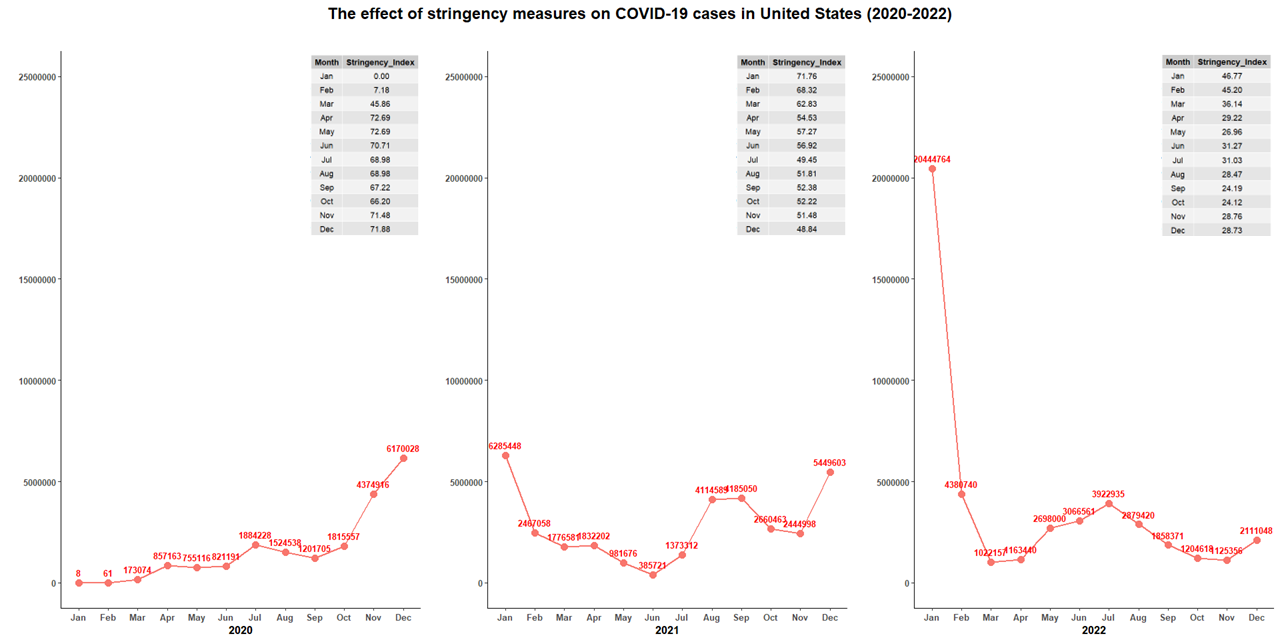

<div style="text-align: justify"> 
$\;\;\;\;\;$ The line graphs, along with the tables, illustrate the impact of stringency measures on COVID-19 cases in the United States from 2020 to 2022. In the first year of the pandemic (2020), the United States implemented stringent safety regulations to keep COVID-19 cases below 7,000,000. As the number of COVID-19 cases decreased in the following months, the United States gradually eased its stringency index in 2021, ranging from 45 to 75 during the peak of the pandemic. However, this relaxation in stringency measures led to a significant surge in COVID-19 cases, reaching a total of 20,444,764 cases in January 2022.
</div>

#### 3.5 Malaysia vs. United States: Age demographics, smoking prevalence, and health outcome comparison

In [ ]:
library(dplyr)
library(fmsb)

malaysia_n_us_radar_data <- rbind(
    cov_data %>%
      filter(country == "Malaysia" & date == as.Date("2022-04-12")) %>%
      reframe(Female_Smoker = female_smokers, Male_Smoker = male_smokers, Median_Age = median_age, Age_Above_65 = aged_65_older,
              Age_Above_70 = aged_70_older, Diabetes_Prevalence = diabetes_prevalence),
    cov_data %>%
      filter(country == "United States" & date == as.Date("2022-04-12")) %>%
      reframe(Female_Smoker = female_smokers, Male_Smoker = male_smokers, Median_Age = median_age, Age_Above_65 = aged_65_older,
              Age_Above_70 = aged_70_older, Diabetes_Prevalence = diabetes_prevalence)
)

# Add 2 lines to the dataframe: the max and min of each observation to show the plot
malaysia_n_us_radar_data <- rbind(rep(50, 6), rep(0, 6), malaysia_n_us_radar_data)

# Print out combined radar chart
radarchart(malaysia_n_us_radar_data, axistype = 1,
           # Custom polygon
           pcol = c("lightgreen", "violet"), plwd = 2, pfcol = c(rgb(0, 0.5, 0, 0.5), rgb(0.8,0.2,0.5,0.5)), plty = 1,
           # Custom grid
           cglty = 1, cglcol = "gray", cglwd = 3, caxislabels = seq(0, 60, 15), axislabcol = "grey",
           # Custom labels
           vlcex = 0.8,
           # Title
           title = "Malaysia vs. United States: Age Demographics, Smoking Prevalence, and Health Outcome Comparison"
           )

# Add legend to the radar chart
legend(x = 1.2, y = 0.2, legend = c("Malaysia", "United States"), bty = "n", pch = 20 , 
       col = c(rgb(0, 0.5, 0, 0.5), rgb(0.8,0.2,0.5,0.5)), text.col = "grey", cex = 0.6, pt.cex = 3, text.font = 2)

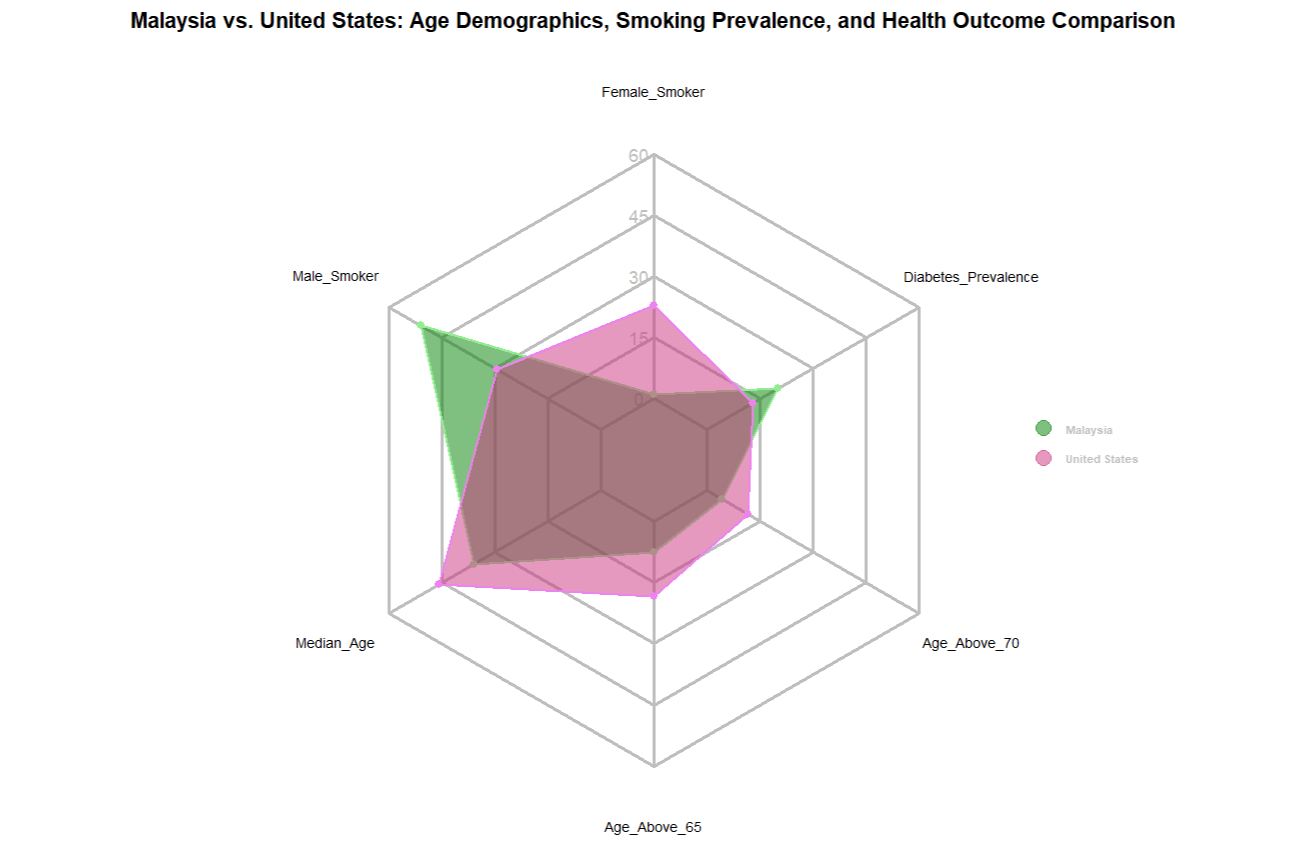

<div style="text-align: justify"> 
$\;\;\;\;\;$ The radar chart presents the Malaysia vs. United States: age demographics, smoking prevalence, and health outcome comparison. The pink radar plot represents the United States, while the green radar plot represents Malaysia. According to the radar chart, Malaysia holds higher male smoker and diabetes prevalences than United States. However, United Stateshas higher median age, age above 65, age above 70, and the female smoker prevalence compared to Malaysia.  
</div>

### <font color='red'> Findings [Question 3]: </font> 

<div style="text-align: justify"> 
$\;\;\;\;\;$ Malaysia had better control over the COVID-19 disease during the pandemic, as indicated by the records from 2020 to 2023. The data shows that the United States had higher death rates as well as a higher proportion of infected population despite that United States had higher population than Malaysia's population. Specifically, United States had a death rate of 0.33% and a proportion of infected population of 30.41%, while Malaysia had a death rate of 0.11% and a proportion of infected population of 14.89%. <br>
<br>
$\;\;\;\;\;$ Firstly, Malaysia demonstrated better implementation of stringency measures during the peak of the pandemic. The line graphs depicting the effect of stringency measures on COVID-19 cases in Malaysia and the United States indicate that Malaysia's stringency index mostly remained at 60 or above during that period, whereas United States mostly remained below 60 in the year of 2021. This implies that Malaysia had a really high level of government intervention and strict measures to control the spread of COVID-19 in terms of the extensive business and school closures, travel restrictions, stay-at-home orders, widespread testing and contact tracing efforts, strict enforcement of social distancing measures, and face mask mandates. <br>
<br>    
$\;\;\;\;\;$ Secondly, Malaysia had a higher prevalence of male smoker but lesser on the prevalence of female smoker. Smokers infected with COVID-19 can transmit the disease to others through respiratory droplets. For instance, when infected smokers exhale smoke, they also release respiratory droplets that can carry the virus. Consequently, these droplets may be inhaled by others nearby, leading to infection. Since Malaysia implemented high levels of stringency measures during the peak of the pandemic, infected smokers found themselves constrained to smoking solely within their homes while being precluded from partaking in social gatherings. Additionally, the general population refrained from casual outings and social gatherings, thus mitigating the potential for contact with both infected smokers and other infected individuals as well. <br>
<br>
$\;\;\;\;\;$ Thirdly, Malaysia had younger age demographics in terms of the lower median age, and a smaller percentage of its population above 60 and 70. A younger age demographic is considered a less significan risk factor when someone gets infected with COVID-19. As individuals age, their immune systems tend to weaken, making it harder for them to fight off infections effectively. This vulnerability makes older adults more suspectible to developing severe symptoms and complications from COVID-19. This implies that the country of United States with lower stringency measures posed a significant risk on older individuals, leading to higher death rates compared to Malaysia. <br>
<br>
$\;\;\;\;\;$ If faced with another pandemic, countries should learn from Malaysia's successful strategies to control COVID-19. Firstly, governments should prioritize the implementation of strict and timely stringency measures during the peak of the pandemic. This includes extensive business and school closures, travel restrictions, stay-at-home orders, widespread testing, contact tracing efforts, and strict enforcement of social distancing measures and face mask mandates. Additionally, countries should address specific risk factors like smoking. Public health campaigns to discourage smoking and reduce prevalence, especially among males, should be a priority. This not only helps to protect smokers themselves but also reduces the risk of transmission through respiratory droplets. In lieu of that, countries should consider their population demographics and vulnerabilities. Having a younger population might be advantageous in terms of mitigating severe cases, but it is crucial to protect the elderly and vulnerable individuals effectively. Special measures should be in place to safeguard older adults, such as providing priority access to vaccines and ensuring their safety in nursing homes and care facilities. Moreover, it is essential for countries to collaborate internationally and share information transparently. The rapid spread of a pandemic demands a united global response, with data and best practices exchanged between countries to find the most effective solutions. <br>
<br> 
</div> 